In [2]:
!pip install geopandas

  Using cached geopandas-0.10.2-py2.py3-none-any.whl (1.0 MB)
  Using cached shapely-2.0.1-cp37-cp37m-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (2.3 MB)
  Obtaining dependency information for fiona>=1.8 from https://files.pythonhosted.org/packages/aa/0d/0e13fe2104f5b248ec47eda7345afff763e25c724bb6705a43f4aa28ed96/Fiona-1.9.4.post1-cp37-cp37m-manylinux2014_x86_64.whl.metadata
  Using cached Fiona-1.9.4.post1-cp37-cp37m-manylinux2014_x86_64.whl.metadata (49 kB)
  Using cached pyproj-3.2.1-cp37-cp37m-manylinux2010_x86_64.whl (6.3 MB)
  Using cached click_plugins-1.1.1-py2.py3-none-any.whl (7.5 kB)
  Using cached cligj-0.7.2-py3-none-any.whl (7.1 kB)
Using cached Fiona-1.9.4.post1-cp37-cp37m-manylinux2014_x86_64.whl (16.5 MB)
DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming 

In [3]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from shapely.wkt import loads
from shapely.geometry import Polygon, LineString, Point
import numpy as np
import os

In [4]:
output_folder = "./plots/"

In [5]:
# Create output folder if it doesn't exist
os.makedirs(output_folder, exist_ok=True)

In [6]:
geo = gpd.read_file('vale_ribeira.dbf')
geo

,ID,CD_GEOCODI,TIPO,CD_GEOCODS,NM_SUBDIST,CD_GEOCODD,NM_DISTRIT,CD_GEOCODM,NM_MUNICIP,NM_MICRO,NM_MESO,ORIG_OGC_F,geometry
0,66717.0,350270505000001,URBANO,35027050500,NaN,350270505,APIAÍ,3502705,APIAÍ,CAPÃO BONITO,ITAPETININGA,1805,"POLYGON ((-48.84713 -24.51469, -48.84753 -24.5..."
1,66718.0,350270505000002,URBANO,35027050500,NaN,350270505,APIAÍ,3502705,APIAÍ,CAPÃO BONITO,ITAPETININGA,1806,"POLYGON ((-48.84580 -24.51313, -48.84650 -24.5..."
2,66719.0,350270505000003,URBANO,35027050500,NaN,350270505,APIAÍ,3502705,APIAÍ,CAPÃO BONITO,ITAPETININGA,1807,"POLYGON ((-48.84489 -24.51740, -48.84509 -24.5..."
3,66720.0,350270505000004,URBANO,35027050500,NaN,350270505,APIAÍ,3502705,APIAÍ,CAPÃO BONITO,ITAPETININGA,1808,"POLYGON ((-48.85038 -24.52333, -48.85048 -24.5..."
4,66721.0,350270505000005,URBANO,35027050500,NaN,350270505,APIAÍ,3502705,APIAÍ,CAPÃO BONITO,ITAPETININGA,1809,"POLYGON ((-48.84228 -24.52494, -48.84244 -24.5..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
949,21414.0,412863305000009,RURAL,41286330500,NaN,412863305,DOUTOR ULYSSES,4128633,DOUTOR ULYSSES,CERRO AZUL,METROPOLITANA DE CURITIBA,17654,"POLYGON ((-49.39916 -24.70718, -49.35284 -24.6..."
950,21415.0,412863305000010,RURAL,41286330500,NaN,412863305,DOUTOR ULYSSES,4128633,DOUTOR ULYSSES,CERRO AZUL,METROPOLITANA DE CURITIBA,17655,"POLYGON ((-49.37073 -24.61246, -49.36844 -24.6..."
951,21416.0,412863305000011,RURAL,41286330500,NaN,412863305,DOUTOR ULYSSES,4128633,DOUTOR ULYSSES,CERRO AZUL,METROPOLITANA DE CURITIBA,17656,"POLYGON ((-49.46065 -24.62345, -49.46026 -24.6..."
952,21417.0,412863305000012,RURAL,41286330500,NaN,412863305,DOUTOR ULYSSES,4128633,DOUTOR ULYSSES,CERRO AZUL,METROPOLITANA DE CURITIBA,17657,"POLYGON ((-49.53348 -24.68126, -49.53345 -24.6..."


In [7]:
geo[['CD_GEOCODI', 'CD_GEOCODM', 'NM_MUNICIP' ]].groupby(by=['CD_GEOCODM', 'NM_MUNICIP'], dropna=False).count()

,,CD_GEOCODI
CD_GEOCODM,NM_MUNICIP,
3502705,APIAÍ,55
3505351,BARRA DO CHAPÉU,11
3505401,BARRA DO TURVO,15
3509254,CAJATI,39
3509908,CANANÉIA,31
3514809,ELDORADO,37
3520301,IGUAPE,65
3520426,ILHA COMPRIDA,31
3521200,IPORANGA,21


In [8]:
df_BR = pd.read_csv('brasil-census-tracts.csv')
df_VR = pd.read_csv('VR_clusters.csv', delimiter=';')
df_VR = pd.merge(df_VR, df_BR[['CD_GEOCODI','WKT']], left_on="Cod_setor", right_on="CD_GEOCODI", how="left")
df_VR['geometry'] = df_VR.WKT.apply(loads)
df_VR.drop('WKT', axis=1, inplace=True) #Drop WKT column


gdf_VR = gpd.GeoDataFrame(df_VR, geometry='geometry')
gdf_VR

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3553: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Unnamed: 0,Cod_setor,lat,long,TIPO,income,longevity,literacy,population,CD_GEOCODI,geometry
0,0,350270505000001,-48.848982,-24.513062,URBANO,0.606203,0.800000,0.970194,521.0,350270505000001,"MULTIPOLYGON (((-48.84713 -24.51469, -48.84753..."
1,1,350270505000002,-48.846967,-24.511579,URBANO,0.671455,0.850000,0.971920,452.0,350270505000002,"MULTIPOLYGON (((-48.84580 -24.51313, -48.84650..."
2,2,350270505000003,-48.845093,-24.514756,URBANO,0.778504,0.933333,0.975673,299.0,350270505000003,"MULTIPOLYGON (((-48.84489 -24.51740, -48.84509..."
3,3,350270505000004,-48.846954,-24.519240,URBANO,0.808376,0.800000,0.939745,358.0,350270505000004,"MULTIPOLYGON (((-48.85038 -24.52333, -48.85048..."
4,4,350270505000005,-48.841910,-24.522869,URBANO,0.545806,0.816667,0.968134,837.0,350270505000005,"MULTIPOLYGON (((-48.84228 -24.52494, -48.84244..."
...,...,...,...,...,...,...,...,...,...,...,...
875,875,412863305000009,-49.350120,-24.719030,RURAL,0.400798,0.750000,0.902424,546.0,412863305000009,"MULTIPOLYGON (((-49.39916 -24.70718, -49.35284..."
876,876,412863305000010,-49.384792,-24.660716,RURAL,0.449906,0.783333,0.900085,570.0,412863305000010,"MULTIPOLYGON (((-49.37073 -24.61246, -49.36844..."
877,877,412863305000011,-49.441333,-24.676312,RURAL,0.461763,0.783333,0.936782,341.0,412863305000011,"MULTIPOLYGON (((-49.46065 -24.62345, -49.46026..."
878,878,412863305000012,-49.493091,-24.678702,RURAL,0.428022,0.750000,0.885842,451.0,412863305000012,"MULTIPOLYGON (((-49.53348 -24.68126, -49.53345..."


In [9]:
geo[['CD_GEOCODI', 'CD_GEOCODM', 'NM_MUNICIP' ]].merge(gdf_VR[['Cod_setor']], how='left', left_on='CD_GEOCODI', right_on='Cod_setor').groupby(by=['CD_GEOCODM', 'NM_MUNICIP'], dropna=False).count().sort_values(by='NM_MUNICIP')

,,CD_GEOCODI,Cod_setor
CD_GEOCODM,NM_MUNICIP,,
4100202,ADRIANÓPOLIS,21,21
3502705,APIAÍ,55,53
3505351,BARRA DO CHAPÉU,11,11
3505401,BARRA DO TURVO,15,14
4103107,BOCAIÚVA DO SUL,23,23
3509254,CAJATI,39,38
3509908,CANANÉIA,31,22
4105201,CERRO AZUL,42,42
4128633,DOUTOR ULYSSES,13,13


/opt/conda/lib/python3.7/site-packages/geopandas/plotting.py:51: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:
/opt/conda/lib/python3.7/site-packages/geopandas/plotting.py:51: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:
/opt/conda/lib/python3.7/site-packages/geopandas/plotting.py:51: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:


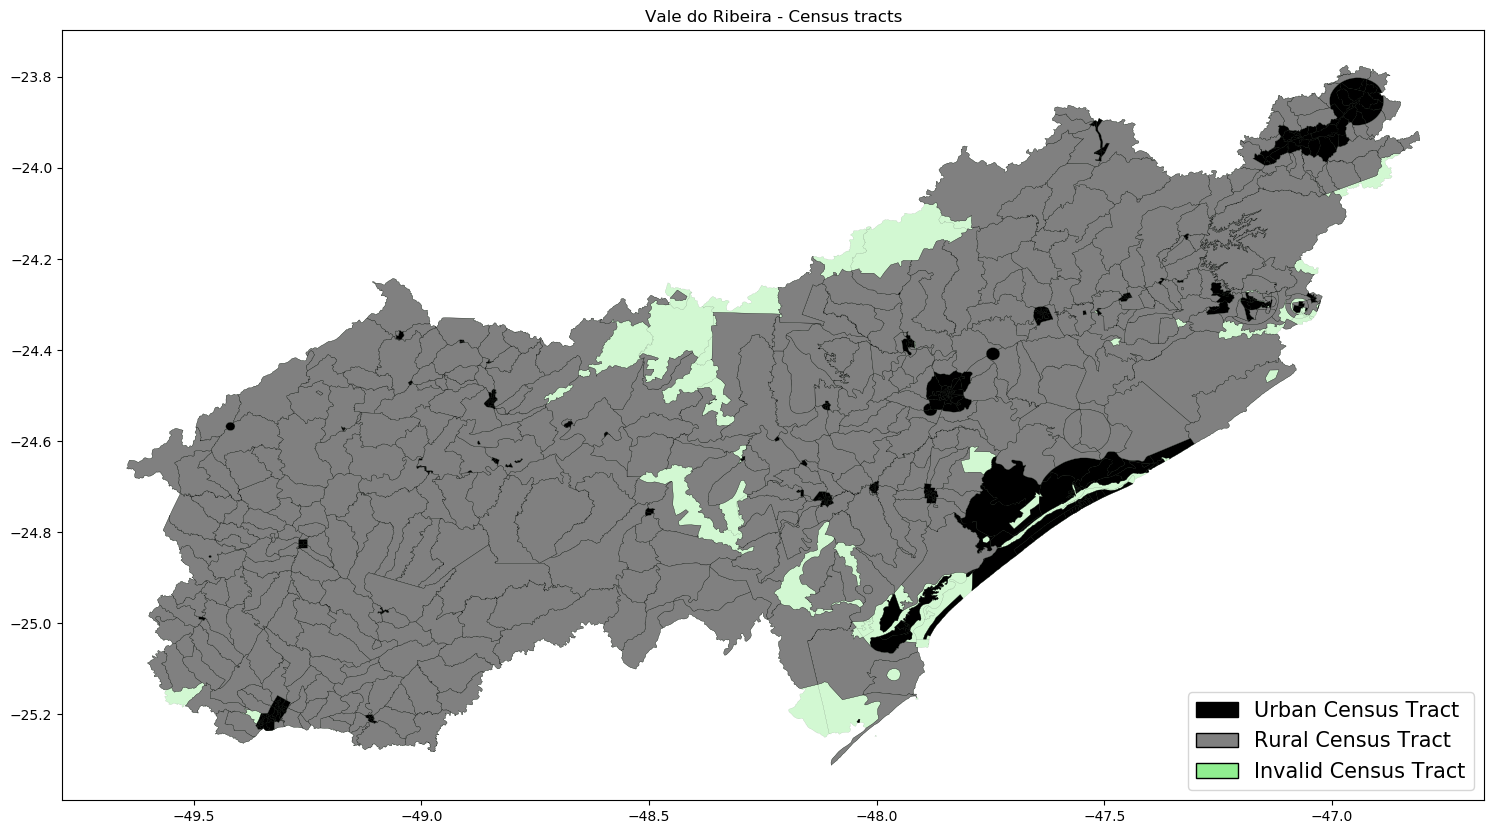

In [10]:
fig, axs = plt.subplots(1, 1, figsize=(5*5, 2*5))
fig.subplots_adjust(hspace=0.5, wspace=0.5)
axs.set_title('Vale do Ribeira - Census tracts')   

# Plotting and storing plot objects
geo.plot(color='lightgreen', alpha=0.4, edgecolor='black', ax=axs, linewidth=0.1)  # contour
gdf_VR[gdf_VR['TIPO'] == 'URBANO'].plot(color='black', alpha=1, edgecolor='black', ax=axs, linewidth=0.2)  # contour
gdf_VR[gdf_VR['TIPO'] == 'RURAL'].plot(color='gray', alpha=1, edgecolor='black', ax=axs, linewidth=0.2)  # contour
#gdf_geo_sm.plot(color='lightblue', alpha=0.6, edgecolor='blue', ax=axs, linewidth=0.1)  # contour
#gdf_OuterPolygon.plot(color='purple', alpha=0.6, edgecolor='purple', ax=axs, linewidth=0.1)  # contour
#gdf_geo_sv.plot(color='red', alpha=0.4, edgecolor='red', ax=axs, linewidth=0.01)  # contour


axs.legend(handles=[                    
                    Patch(facecolor='black', edgecolor='black',label='Urban Census Tract'),
                    Patch(facecolor='gray',edgecolor='black', label='Rural Census Tract'),
                    Patch(facecolor='lightgreen', edgecolor='black', label='Invalid Census Tract'),
                    #Patch(facecolor='lightblue',edgecolor='black', label='Aerial Imagery'),
                    #Patch(facecolor='purple',edgecolor='black', label='Sattelite Imagery'),
                    #Patch(facecolor='red',edgecolor='black', label='Street-Level Imagery')
                   ],
                    loc='lower right',
                    fontsize=15)

plt.show()

#plt.savefig(fname='plots/map_census.jpg', dpi=300, facecolor='w', edgecolor='w',bbox_inches='tight')

In [11]:
df_geo_sm = pd.read_csv('geo_sm.csv')
df_geo_sm

,image_name,NM_MUNICIP,image_lat,image_lon,cluster_lat,cluster_lon,features,area,geometry,setor,Unnamed: 0,lat,long,TIPO,income,longevity,literacy,population
0,-24.328745942316303_-49.111388246241354_-24.42...,APIAÍ,-24.328746,-49.111388,-24.421470,-48.817357,"{'type': 'center_point', 'coordinates': [-24.3...",MULTIPOLYGON(((-48.5833786383066 -24.337911414...,POINT (-49.11138824624136 -24.328745942316303),350270530000002,51.0,-49.049589,-24.310839,RURAL,0.436439,0.800000,0.964335,339.0
1,-24.328745942316303_-49.102875278251105_-24.42...,APIAÍ,-24.328746,-49.102875,-24.421470,-48.817357,"{'type': 'center_point', 'coordinates': [-24.3...",MULTIPOLYGON(((-48.5833786383066 -24.337911414...,POINT (-49.10287527825111 -24.328745942316303),350270530000002,51.0,-49.049589,-24.310839,RURAL,0.436439,0.800000,0.964335,339.0
2,-24.320947354200456_-49.102875278251105_-24.42...,APIAÍ,-24.320947,-49.102875,-24.421470,-48.817357,"{'type': 'center_point', 'coordinates': [-24.3...",MULTIPOLYGON(((-48.5833786383066 -24.337911414...,POINT (-49.10287527825111 -24.320947354200452),350270530000002,51.0,-49.049589,-24.310839,RURAL,0.436439,0.800000,0.964335,339.0
3,-24.336544530432146_-49.09436231026086_-24.421...,APIAÍ,-24.336545,-49.094362,-24.421470,-48.817357,"{'type': 'center_point', 'coordinates': [-24.3...",MULTIPOLYGON(((-48.5833786383066 -24.337911414...,POINT (-49.094362310260856 -24.336544530432143),350270530000002,51.0,-49.049589,-24.310839,RURAL,0.436439,0.800000,0.964335,339.0
4,-24.328745942316303_-49.09436231026086_-24.421...,APIAÍ,-24.328746,-49.094362,-24.421470,-48.817357,"{'type': 'center_point', 'coordinates': [-24.3...",MULTIPOLYGON(((-48.5833786383066 -24.337911414...,POINT (-49.094362310260856 -24.328745942316303),350270530000002,51.0,-49.049589,-24.310839,RURAL,0.436439,0.800000,0.964335,339.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31146,-24.70493405897603_-49.22055342451572_-24.6253...,DOUTOR ULYSSES,-24.704934,-49.220553,-24.625378,-49.392223,"{'type': 'center_point', 'coordinates': [-24.7...",MULTIPOLYGON(((-49.4038750791893 -24.498103035...,POINT (-49.220553424515714 -24.70493405897603),412863305000006,872.0,-49.267460,-24.712696,RURAL,0.407464,0.750000,0.933594,381.0
31147,-24.782637892796757_-49.21201519318726_-24.625...,DOUTOR ULYSSES,-24.782638,-49.212015,-24.625378,-49.392223,"{'type': 'center_point', 'coordinates': [-24.7...",MULTIPOLYGON(((-49.4038750791893 -24.498103035...,POINT (-49.212015193187256 -24.78263789279676),412863305000007,873.0,-49.240663,-24.764145,RURAL,0.502978,0.716667,0.896348,220.0
31148,-24.774867509414683_-49.21201519318726_-24.625...,DOUTOR ULYSSES,-24.774868,-49.212015,-24.625378,-49.392223,"{'type': 'center_point', 'coordinates': [-24.7...",MULTIPOLYGON(((-49.4038750791893 -24.498103035...,POINT (-49.212015193187256 -24.774867509414683),412863305000007,873.0,-49.240663,-24.764145,RURAL,0.502978,0.716667,0.896348,220.0
31149,-24.76709712603261_-49.21201519318726_-24.6253...,DOUTOR ULYSSES,-24.767097,-49.212015,-24.625378,-49.392223,"{'type': 'center_point', 'coordinates': [-24.7...",MULTIPOLYGON(((-49.4038750791893 -24.498103035...,POINT (-49.212015193187256 -24.76709712603261),412863305000007,873.0,-49.240663,-24.764145,RURAL,0.502978,0.716667,0.896348,220.0


In [12]:
df_outer = df_VR[(~df_VR['Cod_setor'].isin(df_geo_sm['setor'].unique()))]
gdf_Outer = gpd.GeoDataFrame(
    df_outer, geometry=gpd.points_from_xy(df_outer.lat, df_outer.long))
gdf_Outer

,Unnamed: 0,Cod_setor,lat,long,TIPO,income,longevity,literacy,population,CD_GEOCODI,geometry
0,0,350270505000001,-48.848982,-24.513062,URBANO,0.606203,0.800000,0.970194,521.0,350270505000001,POINT (-48.84898 -24.51306)
1,1,350270505000002,-48.846967,-24.511579,URBANO,0.671455,0.850000,0.971920,452.0,350270505000002,POINT (-48.84697 -24.51158)
2,2,350270505000003,-48.845093,-24.514756,URBANO,0.778504,0.933333,0.975673,299.0,350270505000003,POINT (-48.84509 -24.51476)
4,4,350270505000005,-48.841910,-24.522869,URBANO,0.545806,0.816667,0.968134,837.0,350270505000005,POINT (-48.84191 -24.52287)
6,6,350270505000007,-48.849542,-24.515054,URBANO,0.609459,0.816667,0.970104,310.0,350270505000007,POINT (-48.84954 -24.51505)
...,...,...,...,...,...,...,...,...,...,...,...
850,850,412220605000054,-49.302733,-25.215822,RURAL,0.504002,0.650000,0.891662,523.0,412220605000054,POINT (-49.30273 -25.21582)
851,851,412220610000001,-49.482139,-24.989537,URBANO,0.564022,0.683333,0.969136,71.0,412220610000001,POINT (-49.48214 -24.98954)
855,855,412788205000001,-49.087273,-24.972205,URBANO,0.573401,0.733333,0.855208,1082.0,412788205000001,POINT (-49.08727 -24.97220)
860,860,412788205000006,-48.928630,-24.979127,RURAL,0.513213,0.783333,0.541950,553.0,412788205000006,POINT (-48.92863 -24.97913)


In [13]:
def create_polygon(row):
    #return Polygon([(row['image_lon'], row['image_lat']), (row['image_lon'], row['cluster_lat']), (row['cluster_lon'], row['image_lat']), (row['cluster_lon'], row['cluster_lat'])])
    # Extract the latitude and longitude from the dataframe row
    image_lon = row["image_lon"]
    image_lat = row["image_lat"]

    # Define the coordinates for the four corners of the polygon
    corner1 = (image_lon, image_lat)
    corner2 = (image_lon + 0.00899322, image_lat)  # 1 km longitude distance
    corner3 = (image_lon + 0.00899322, image_lat + 0.00899322)  # 1 km longitude and latitude distance
    corner4 = (image_lon, image_lat + 0.00899322)  # 1 km latitude distance

    # Create a Shapely Polygon using the coordinates
    polygon = Polygon([corner1, corner2, corner3, corner4])

    # Project the polygon to account for the curvature of the Earth
    #project = partial(
    #    pyproj.transform,
    #    pyproj.Proj(init="EPSG:3857"),  # WGS 84 (latitude/longitude) coordinate system
    #    pyproj.Proj(proj="aeqd", lat_0=image_lat, lon_0=image_lon),  # Azimuthal Equidistant projection centered at the corner
    #)
    #projected_polygon = transform(project, polygon)

    return polygon


In [14]:
df_geo_sm['polygon'] = df_geo_sm.apply(create_polygon, axis=1)

In [15]:
gdf_geo_sm = gpd.GeoDataFrame(
    df_geo_sm, geometry='polygon')
gdf_geo_sm

,image_name,NM_MUNICIP,image_lat,image_lon,cluster_lat,cluster_lon,features,area,geometry,setor,Unnamed: 0,lat,long,TIPO,income,longevity,literacy,population,polygon
0,-24.328745942316303_-49.111388246241354_-24.42...,APIAÍ,-24.328746,-49.111388,-24.421470,-48.817357,"{'type': 'center_point', 'coordinates': [-24.3...",MULTIPOLYGON(((-48.5833786383066 -24.337911414...,POINT (-49.11138824624136 -24.328745942316303),350270530000002,51.0,-49.049589,-24.310839,RURAL,0.436439,0.800000,0.964335,339.0,"POLYGON ((-49.11139 -24.32875, -49.10240 -24.3..."
1,-24.328745942316303_-49.102875278251105_-24.42...,APIAÍ,-24.328746,-49.102875,-24.421470,-48.817357,"{'type': 'center_point', 'coordinates': [-24.3...",MULTIPOLYGON(((-48.5833786383066 -24.337911414...,POINT (-49.10287527825111 -24.328745942316303),350270530000002,51.0,-49.049589,-24.310839,RURAL,0.436439,0.800000,0.964335,339.0,"POLYGON ((-49.10288 -24.32875, -49.09388 -24.3..."
2,-24.320947354200456_-49.102875278251105_-24.42...,APIAÍ,-24.320947,-49.102875,-24.421470,-48.817357,"{'type': 'center_point', 'coordinates': [-24.3...",MULTIPOLYGON(((-48.5833786383066 -24.337911414...,POINT (-49.10287527825111 -24.320947354200452),350270530000002,51.0,-49.049589,-24.310839,RURAL,0.436439,0.800000,0.964335,339.0,"POLYGON ((-49.10288 -24.32095, -49.09388 -24.3..."
3,-24.336544530432146_-49.09436231026086_-24.421...,APIAÍ,-24.336545,-49.094362,-24.421470,-48.817357,"{'type': 'center_point', 'coordinates': [-24.3...",MULTIPOLYGON(((-48.5833786383066 -24.337911414...,POINT (-49.094362310260856 -24.336544530432143),350270530000002,51.0,-49.049589,-24.310839,RURAL,0.436439,0.800000,0.964335,339.0,"POLYGON ((-49.09436 -24.33654, -49.08537 -24.3..."
4,-24.328745942316303_-49.09436231026086_-24.421...,APIAÍ,-24.328746,-49.094362,-24.421470,-48.817357,"{'type': 'center_point', 'coordinates': [-24.3...",MULTIPOLYGON(((-48.5833786383066 -24.337911414...,POINT (-49.094362310260856 -24.328745942316303),350270530000002,51.0,-49.049589,-24.310839,RURAL,0.436439,0.800000,0.964335,339.0,"POLYGON ((-49.09436 -24.32875, -49.08537 -24.3..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31146,-24.70493405897603_-49.22055342451572_-24.6253...,DOUTOR ULYSSES,-24.704934,-49.220553,-24.625378,-49.392223,"{'type': 'center_point', 'coordinates': [-24.7...",MULTIPOLYGON(((-49.4038750791893 -24.498103035...,POINT (-49.220553424515714 -24.70493405897603),412863305000006,872.0,-49.267460,-24.712696,RURAL,0.407464,0.750000,0.933594,381.0,"POLYGON ((-49.22055 -24.70493, -49.21156 -24.7..."
31147,-24.782637892796757_-49.21201519318726_-24.625...,DOUTOR ULYSSES,-24.782638,-49.212015,-24.625378,-49.392223,"{'type': 'center_point', 'coordinates': [-24.7...",MULTIPOLYGON(((-49.4038750791893 -24.498103035...,POINT (-49.212015193187256 -24.78263789279676),412863305000007,873.0,-49.240663,-24.764145,RURAL,0.502978,0.716667,0.896348,220.0,"POLYGON ((-49.21202 -24.78264, -49.20302 -24.7..."
31148,-24.774867509414683_-49.21201519318726_-24.625...,DOUTOR ULYSSES,-24.774868,-49.212015,-24.625378,-49.392223,"{'type': 'center_point', 'coordinates': [-24.7...",MULTIPOLYGON(((-49.4038750791893 -24.498103035...,POINT (-49.212015193187256 -24.774867509414683),412863305000007,873.0,-49.240663,-24.764145,RURAL,0.502978,0.716667,0.896348,220.0,"POLYGON ((-49.21202 -24.77487, -49.20302 -24.7..."
31149,-24.76709712603261_-49.21201519318726_-24.6253...,DOUTOR ULYSSES,-24.767097,-49.212015,-24.625378,-49.392223,"{'type': 'center_point', 'coordinates': [-24.7...",MULTIPOLYGON(((-49.4038750791893 -24.498103035...,POINT (-49.212015193187256 -24.76709712603261),412863305000007,873.0,-49.240663,-24.764145,RURAL,0.502978,0.716667,0.896348,220.0,"POLYGON ((-49.21202 -24.76710, -49.20302 -24.7..."


In [16]:
gdf_geo_sm['setor'].nunique()

732

In [17]:
gdf_geo_sm[gdf_geo_sm['income'].isnull()]['setor'].nunique()

60

In [18]:
def create_point(row):
    return Point([(row['longitude'], row['latitude'])])


In [19]:
df_geo_sv = pd.read_csv('geo_sv.csv')
df_geo_sv['POINT'] = df_geo_sv.apply(create_point, axis=1)
gdf_geo_sv = gpd.GeoDataFrame(df_geo_sv, geometry = 'POINT')


In [20]:
def createPolygonFromCenter(row):
    # Extract the center longitude and latitude from the dataframe row
    center_lon = row["lat"]
    center_lat = row["long"]

    # Calculate half the side length of the square (6.7 km / 2)
    half_side_length = 6.7 * 0.5 / 111.32  # 1 degree of latitude is about 111.32 km

    # Calculate the coordinates of the four corners of the square
    corner1 = (center_lon - half_side_length, center_lat - half_side_length)
    corner2 = (center_lon + half_side_length, center_lat - half_side_length)
    corner3 = (center_lon + half_side_length, center_lat + half_side_length)
    corner4 = (center_lon - half_side_length, center_lat + half_side_length)

    # Create a Shapely Polygon using the coordinates
    polygon = Polygon([corner1, corner2, corner3, corner4])

    return polygon

In [21]:
#gdf_Outer['polygon'] = gdf_VR.apply(createPolygonFromCenter, axis=1)

In [22]:
gdf_OuterPolygon = gpd.GeoDataFrame(
    df_VR, geometry=gpd.points_from_xy(df_VR.lat, df_VR.long))
gdf_OuterPolygon['geometry'] = gdf_OuterPolygon.apply(createPolygonFromCenter, axis=1)
gdf_OuterPolygon

,Unnamed: 0,Cod_setor,lat,long,TIPO,income,longevity,literacy,population,CD_GEOCODI,geometry
0,0,350270505000001,-48.848982,-24.513062,URBANO,0.606203,0.800000,0.970194,521.0,350270505000001,"POLYGON ((-48.87908 -24.54316, -48.81889 -24.5..."
1,1,350270505000002,-48.846967,-24.511579,URBANO,0.671455,0.850000,0.971920,452.0,350270505000002,"POLYGON ((-48.87706 -24.54167, -48.81687 -24.5..."
2,2,350270505000003,-48.845093,-24.514756,URBANO,0.778504,0.933333,0.975673,299.0,350270505000003,"POLYGON ((-48.87519 -24.54485, -48.81500 -24.5..."
3,3,350270505000004,-48.846954,-24.519240,URBANO,0.808376,0.800000,0.939745,358.0,350270505000004,"POLYGON ((-48.87705 -24.54933, -48.81686 -24.5..."
4,4,350270505000005,-48.841910,-24.522869,URBANO,0.545806,0.816667,0.968134,837.0,350270505000005,"POLYGON ((-48.87200 -24.55296, -48.81182 -24.5..."
...,...,...,...,...,...,...,...,...,...,...,...
875,875,412863305000009,-49.350120,-24.719030,RURAL,0.400798,0.750000,0.902424,546.0,412863305000009,"POLYGON ((-49.38021 -24.74912, -49.32003 -24.7..."
876,876,412863305000010,-49.384792,-24.660716,RURAL,0.449906,0.783333,0.900085,570.0,412863305000010,"POLYGON ((-49.41489 -24.69081, -49.35470 -24.6..."
877,877,412863305000011,-49.441333,-24.676312,RURAL,0.461763,0.783333,0.936782,341.0,412863305000011,"POLYGON ((-49.47143 -24.70641, -49.41124 -24.7..."
878,878,412863305000012,-49.493091,-24.678702,RURAL,0.428022,0.750000,0.885842,451.0,412863305000012,"POLYGON ((-49.52318 -24.70880, -49.46300 -24.7..."


/opt/conda/lib/python3.7/site-packages/geopandas/plotting.py:51: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:


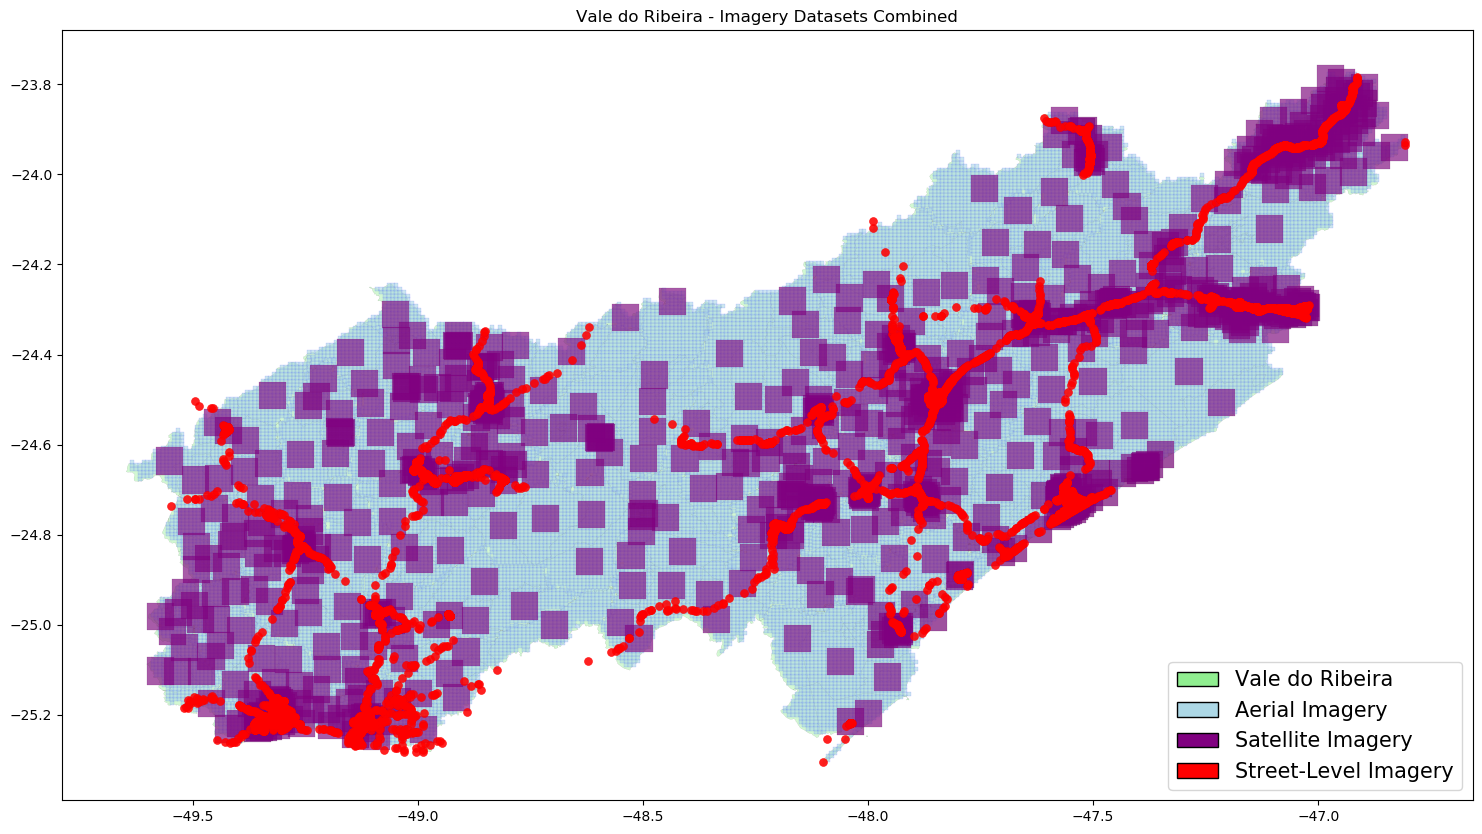

In [23]:
fig, axs = plt.subplots(1, 1, figsize=(5*5, 2*5))
fig.subplots_adjust(hspace=0.5, wspace=0.5)
axs.set_title('Vale do Ribeira - Imagery Datasets Combined')   

# Plotting and storing plot objects
geo.plot(color='lightgreen', alpha=0.4, edgecolor='black', ax=axs, linewidth=0.1)  # contour
gdf_VR[gdf_VR['TIPO'] == 'URBANO'].plot(color='black', alpha=0.2, edgecolor='black', ax=axs, linewidth=0.2)  # contour
gdf_VR[gdf_VR['TIPO'] == 'RURAL'].plot(color='gray', alpha=0.2, edgecolor='black', ax=axs, linewidth=0.2)  # contour
gdf_geo_sm.plot(color='lightblue', alpha=0.6, edgecolor='blue', ax=axs, linewidth=0.1)  # contour
gdf_OuterPolygon.plot(color='purple', alpha=0.6, edgecolor='purple', ax=axs, linewidth=0.1)  # contour
gdf_geo_sv.plot(color='red', alpha=0.4, edgecolor='red', ax=axs, linewidth=0.01)  # contour


axs.legend(handles=[
                    Patch(facecolor='lightgreen', edgecolor='black', label='Vale do Ribeira'),
                    #Patch(facecolor='black', edgecolor='black',label='Urban area'),
                    #Patch(facecolor='gray',edgecolor='black', label='Rural area'),
                    Patch(facecolor='lightblue',edgecolor='black', label='Aerial Imagery'),
                    Patch(facecolor='purple',edgecolor='black', label='Satellite Imagery'),
                    Patch(facecolor='red',edgecolor='black', label='Street-Level Imagery')
                   ],
                    loc='lower right',
                    fontsize=15)

plt.show()

#plt.savefig(fname='plots/map_imagery.jpg', dpi=300, facecolor='w', edgecolor='w',bbox_inches='tight')

In [24]:
df_VR

,Unnamed: 0,Cod_setor,lat,long,TIPO,income,longevity,literacy,population,CD_GEOCODI,geometry
0,0,350270505000001,-48.848982,-24.513062,URBANO,0.606203,0.800000,0.970194,521.0,350270505000001,"POLYGON ((-48.87908 -24.54316, -48.81889 -24.5..."
1,1,350270505000002,-48.846967,-24.511579,URBANO,0.671455,0.850000,0.971920,452.0,350270505000002,"POLYGON ((-48.87706 -24.54167, -48.81687 -24.5..."
2,2,350270505000003,-48.845093,-24.514756,URBANO,0.778504,0.933333,0.975673,299.0,350270505000003,"POLYGON ((-48.87519 -24.54485, -48.81500 -24.5..."
3,3,350270505000004,-48.846954,-24.519240,URBANO,0.808376,0.800000,0.939745,358.0,350270505000004,"POLYGON ((-48.87705 -24.54933, -48.81686 -24.5..."
4,4,350270505000005,-48.841910,-24.522869,URBANO,0.545806,0.816667,0.968134,837.0,350270505000005,"POLYGON ((-48.87200 -24.55296, -48.81182 -24.5..."
...,...,...,...,...,...,...,...,...,...,...,...
875,875,412863305000009,-49.350120,-24.719030,RURAL,0.400798,0.750000,0.902424,546.0,412863305000009,"POLYGON ((-49.38021 -24.74912, -49.32003 -24.7..."
876,876,412863305000010,-49.384792,-24.660716,RURAL,0.449906,0.783333,0.900085,570.0,412863305000010,"POLYGON ((-49.41489 -24.69081, -49.35470 -24.6..."
877,877,412863305000011,-49.441333,-24.676312,RURAL,0.461763,0.783333,0.936782,341.0,412863305000011,"POLYGON ((-49.47143 -24.70641, -49.41124 -24.7..."
878,878,412863305000012,-49.493091,-24.678702,RURAL,0.428022,0.750000,0.885842,451.0,412863305000012,"POLYGON ((-49.52318 -24.70880, -49.46300 -24.7..."


In [25]:
df_VR['income_category'] = pd.qcut(df_VR['income'], q=5)
df_VR['population_category'] = pd.qcut(df_VR['population'], q=5)
df_VR['literacy_category'] = pd.qcut(df_VR['literacy'], q=5)
df_VR['longevity_category'] = pd.qcut(df_VR['longevity'], q=5)

In [26]:
income_counts = df_VR['income_category'].value_counts()
income_counts = income_counts.sort_index()
print(income_counts)

(0.209, 0.468]    176
(0.468, 0.509]    176
(0.509, 0.545]    176
(0.545, 0.593]    176
(0.593, 0.823]    176
Name: income_category, dtype: int64


In [27]:
# Define the bins for income categories
bins = [0, 0.2, 0.4, 0.6, 0.8, 1.0]
labels = ['[1] 0-0.2', '[2] 0.2-0.4', '[3] 0.4-0.6', '[4] 0.6-0.8', '[5] 0.8-1.0']

# Categorize the income data
df_VR['income_category'] = pd.cut(df_VR['income'], bins=bins, labels=labels, include_lowest=True)

# Count the number of rows in each category
category_counts = df_VR['income_category'].value_counts().sort_index()



In [28]:
# Calculate the minimum and maximum values of income
min_income = df_VR['income'].min()
max_income = df_VR['income'].max()

# Define the number of bins
num_bins = 5

# Create equally spaced bins
bins = pd.cut(df_VR['income'], bins=num_bins, labels=False)


# Count the number of rows in each category
income_category_counts = bins.value_counts().sort_index()


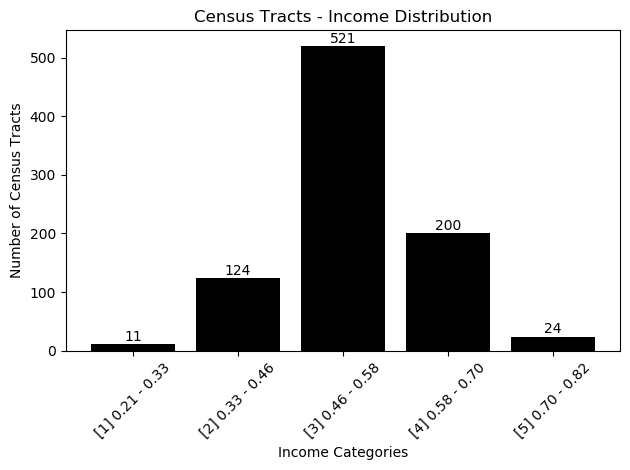

In [29]:
#plt.figure(figsize=(4,5)) 
# Create a bar chart
plt.bar(income_category_counts.index, income_category_counts.values, color = 'black')
plt.xlabel('Income Categories')
plt.ylabel('Number of Census Tracts')
plt.title('Census Tracts - Income Distribution')
#plt.xticks(range(num_bins), [f'{min_income + i * (max_income - min_income)/num_bins:.2f} - {min_income + (i+1) * (max_income - min_income)/num_bins:.2f}' for i in range(num_bins)], rotation=45)
xtick_labels = [f'[{i+1}] {label}' for i, label in enumerate([f'{min_income + i * (max_income - min_income)/num_bins:.2f} - {min_income + (i+1) * (max_income - min_income)/num_bins:.2f}' for i in range(num_bins)])]
plt.xticks(range(num_bins), xtick_labels, rotation=45)


# Add value labels on top of each bar
for i, count in enumerate(income_category_counts):
    plt.text(i, count + 0.1, str(count), ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [30]:
# Calculate the minimum and maximum values of income
min_literacy = df_VR['literacy'].min()
max_literacy = df_VR['literacy'].max()

# Define the number of bins
num_bins = 5

# Create equally spaced bins
bins_literacy = pd.cut(df_VR['literacy'], bins=num_bins, labels=False)


# Count the number of rows in each category
literacy_category_counts = bins_literacy.value_counts().sort_index()


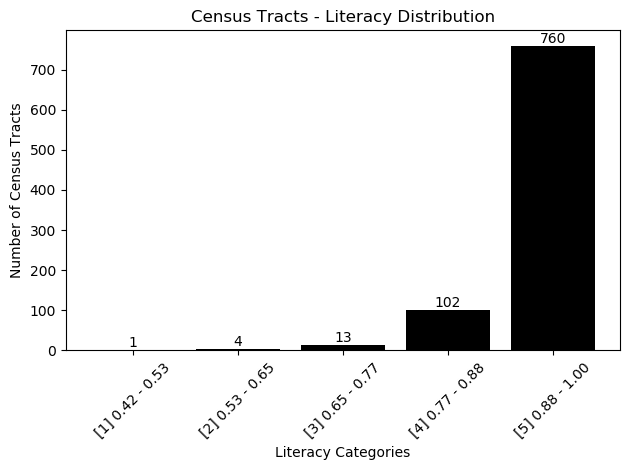

In [31]:
#plt.figure(figsize=(4,5)) 
# Create a bar chart
plt.bar(literacy_category_counts.index, literacy_category_counts.values, color = 'black')
plt.xlabel('Literacy Categories')
plt.ylabel('Number of Census Tracts')
plt.title('Census Tracts - Literacy Distribution')
#plt.xticks(range(num_bins), [f'{min_income + i * (max_income - min_income)/num_bins:.2f} - {min_income + (i+1) * (max_income - min_income)/num_bins:.2f}' for i in range(num_bins)], rotation=45)
xtick_labels = [f'[{i+1}] {label}' for i, label in enumerate([f'{min_literacy + i * (max_literacy - min_literacy)/num_bins:.2f} - {min_literacy + (i+1) * (max_literacy - min_literacy)/num_bins:.2f}' for i in range(num_bins)])]
plt.xticks(range(num_bins), xtick_labels, rotation=45)


# Add value labels on top of each bar
for i, count in enumerate(literacy_category_counts):
    plt.text(i, count + 0.1, str(count), ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [32]:
# Calculate the minimum and maximum values of income
min_longevity = df_VR['longevity'].min()
max_longevity = df_VR['longevity'].max()

# Define the number of bins
num_bins = 5

# Create equally spaced bins
bins_longevity = pd.cut(df_VR['longevity'], bins=num_bins, labels=False)


# Count the number of rows in each category
longevity_category_counts = bins_longevity.value_counts().sort_index()


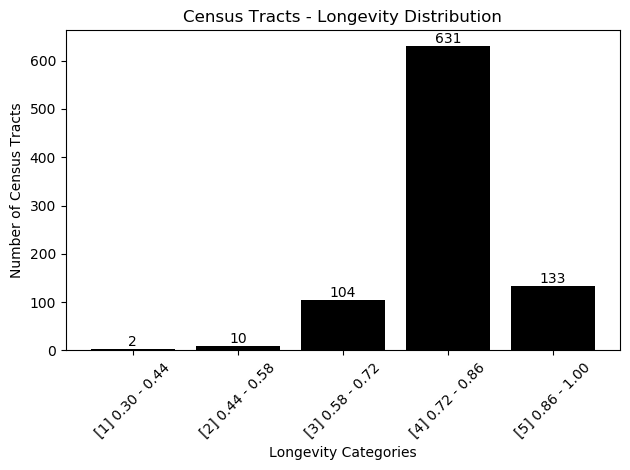

In [33]:

# Create a bar chart
plt.bar(longevity_category_counts.index, longevity_category_counts.values, color = 'black')
plt.xlabel('Longevity Categories')
plt.ylabel('Number of Census Tracts')
plt.title('Census Tracts - Longevity Distribution')
xtick_labels = [f'[{i+1}] {label}' for i, label in enumerate([f'{min_longevity + i * (max_longevity - min_longevity)/num_bins:.2f} - {min_longevity + (i+1) * (max_longevity - min_longevity)/num_bins:.2f}' for i in range(num_bins)])]
plt.xticks(range(num_bins), xtick_labels, rotation=45)


# Add value labels on top of each bar
for i, count in enumerate(longevity_category_counts):
    plt.text(i, count + 0.1, str(count), ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [34]:
# Calculate the minimum and maximum values of income
min_population = df_VR['population'].min()
max_population = df_VR['population'].max()

# Define the number of bins
num_bins = 5

# Create equally spaced bins
bins_population = pd.cut(df_VR['population'], bins=num_bins, labels=False)


# Count the number of rows in each category
population_category_counts = bins_population.value_counts().sort_index()


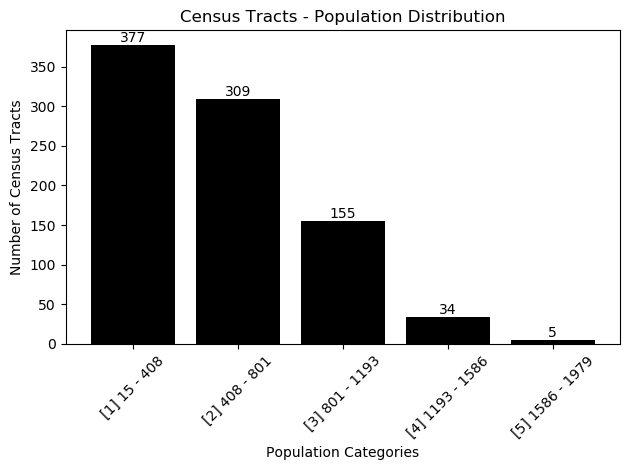

In [35]:

# Create a bar chart
plt.bar(population_category_counts.index, population_category_counts.values, color = 'black')
plt.xlabel('Population Categories')
plt.ylabel('Number of Census Tracts')
plt.title('Census Tracts - Population Distribution')
xtick_labels = [f'[{i+1}] {label}' for i, label in enumerate([f'{min_population + i * (max_population - min_population)/num_bins:.0f} - {min_population + (i+1) * (max_population - min_population)/num_bins:.0f}' for i in range(num_bins)])]
plt.xticks(range(num_bins), xtick_labels, rotation=45)


# Add value labels on top of each bar
for i, count in enumerate(population_category_counts):
    plt.text(i, count + 0.1, str(count), ha='center', va='bottom')

plt.tight_layout()
plt.show()

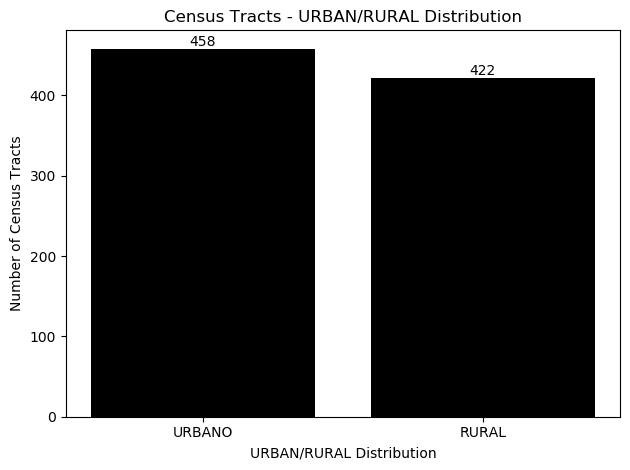

In [36]:
# Count the number of occurrences for each value in the "TIPO" column
tipo_counts = df_VR['TIPO'].value_counts()


# Create a bar chart
plt.bar(tipo_counts.index, tipo_counts.values, color = 'black')
plt.xlabel('URBAN/RURAL Distribution')
plt.ylabel('Number of Census Tracts')
plt.title('Census Tracts - URBAN/RURAL Distribution')


# Add value labels on top of each bar
for i, count in enumerate(tipo_counts):
    plt.text(i, count + 0.1, str(count), ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [37]:
df_geo_sv

,city,direction,filename,latitude,longitude,name,pano_id,uf,geometry,setor,POINT
0,APIAÍ,0,amYzj4DUMQbgHzB9M3a_WA-0.jpg,-24.514697,-48.846783,unknown,amYzj4DUMQbgHzB9M3a_WA,unknown,POINT (-48.8467829 -24.51469710000001),3.502705e+14,POINT (-48.84678 -24.51470)
1,APIAÍ,90,amYzj4DUMQbgHzB9M3a_WA-90.jpg,-24.514697,-48.846783,unknown,amYzj4DUMQbgHzB9M3a_WA,unknown,POINT (-48.8467829 -24.51469710000001),3.502705e+14,POINT (-48.84678 -24.51470)
2,APIAÍ,180,amYzj4DUMQbgHzB9M3a_WA-180.jpg,-24.514697,-48.846783,unknown,amYzj4DUMQbgHzB9M3a_WA,unknown,POINT (-48.8467829 -24.51469710000001),3.502705e+14,POINT (-48.84678 -24.51470)
3,APIAÍ,270,amYzj4DUMQbgHzB9M3a_WA-270.jpg,-24.514697,-48.846783,unknown,amYzj4DUMQbgHzB9M3a_WA,unknown,POINT (-48.8467829 -24.51469710000001),3.502705e+14,POINT (-48.84678 -24.51470)
4,APIAÍ,0,LoaIOwDck-H26nB1MZdD7Q-0.jpg,-24.514405,-48.846691,unknown,LoaIOwDck-H26nB1MZdD7Q,unknown,POINT (-48.84669064403143 -24.51440519523027),3.502705e+14,POINT (-48.84669 -24.51441)
...,...,...,...,...,...,...,...,...,...,...,...
112363,DOUTOR ULYSSES,270,oSXOgE7j3mV9lfiPJMwySA-270.jpg,-24.646414,-49.425382,unknown,oSXOgE7j3mV9lfiPJMwySA,unknown,POINT (-49.42538241476539 -24.64641441220216),4.128633e+14,POINT (-49.42538 -24.64641)
112364,DOUTOR ULYSSES,0,VknK6sWJIKFoVDOPr94viA-0.jpg,-24.625669,-49.418806,unknown,VknK6sWJIKFoVDOPr94viA,unknown,POINT (-49.41880613831557 -24.62566856991785),4.128633e+14,POINT (-49.41881 -24.62567)
112365,DOUTOR ULYSSES,90,VknK6sWJIKFoVDOPr94viA-90.jpg,-24.625669,-49.418806,unknown,VknK6sWJIKFoVDOPr94viA,unknown,POINT (-49.41880613831557 -24.62566856991785),4.128633e+14,POINT (-49.41881 -24.62567)
112366,DOUTOR ULYSSES,180,VknK6sWJIKFoVDOPr94viA-180.jpg,-24.625669,-49.418806,unknown,VknK6sWJIKFoVDOPr94viA,unknown,POINT (-49.41880613831557 -24.62566856991785),4.128633e+14,POINT (-49.41881 -24.62567)


In [38]:
# Calculate the minimum and maximum values of income
min_income = df_geo_sm['income'].min()
max_income = df_geo_sm['income'].max()

# Define the number of bins
num_bins = 5

# Create equally spaced bins
bins = pd.cut(df_geo_sm['income'], bins=num_bins, labels=False)


# Count the number of rows in each category
income_category_counts = bins.value_counts().sort_index()


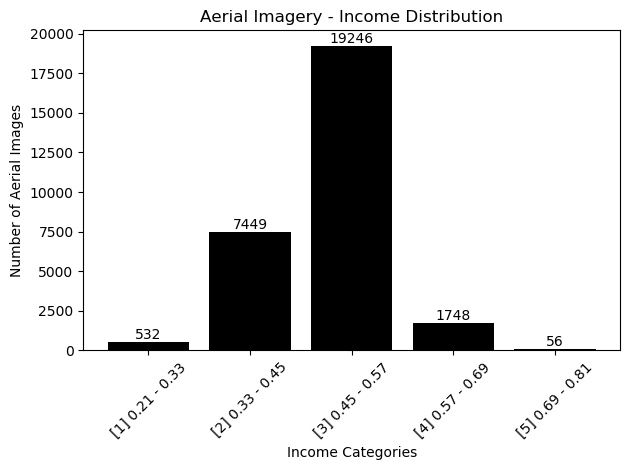

In [39]:
#plt.figure(figsize=(4,5)) 
# Create a bar chart
plt.bar(income_category_counts.index, income_category_counts.values, color = 'black')
plt.xlabel('Income Categories')
plt.ylabel('Number of Aerial Images')
plt.title('Aerial Imagery - Income Distribution')
#plt.xticks(range(num_bins), [f'{min_income + i * (max_income - min_income)/num_bins:.2f} - {min_income + (i+1) * (max_income - min_income)/num_bins:.2f}' for i in range(num_bins)], rotation=45)
xtick_labels = [f'[{i+1}] {label}' for i, label in enumerate([f'{min_income + i * (max_income - min_income)/num_bins:.2f} - {min_income + (i+1) * (max_income - min_income)/num_bins:.2f}' for i in range(num_bins)])]
plt.xticks(range(num_bins), xtick_labels, rotation=45)


# Add value labels on top of each bar
for i, count in enumerate(income_category_counts):
    plt.text(i, count + 0.1, str(count), ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [40]:
# Calculate the minimum and maximum values of income
min_literacy = df_geo_sm['literacy'].min()
max_literacy = df_geo_sm['literacy'].max()

# Define the number of bins
num_bins = 5

# Create equally spaced bins
bins_literacy = pd.cut(df_geo_sm['literacy'], bins=num_bins, labels=False)


# Count the number of rows in each category
literacy_category_counts = bins_literacy.value_counts().sort_index()


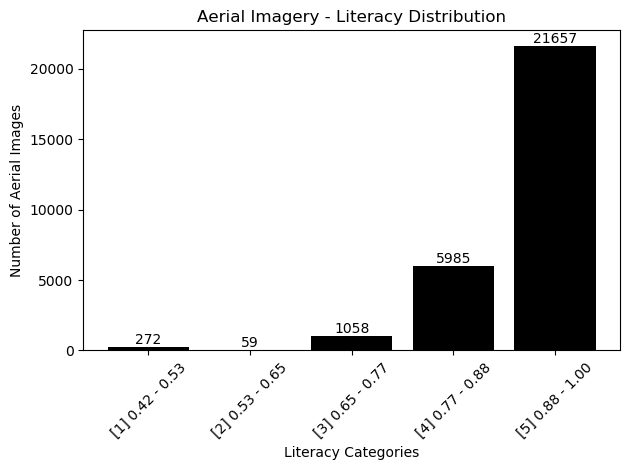

In [41]:
#plt.figure(figsize=(4,5)) 
# Create a bar chart
plt.bar(literacy_category_counts.index, literacy_category_counts.values, color = 'black')
plt.xlabel('Literacy Categories')
plt.ylabel('Number of Aerial Images')
plt.title('Aerial Imagery - Literacy Distribution')
#plt.xticks(range(num_bins), [f'{min_income + i * (max_income - min_income)/num_bins:.2f} - {min_income + (i+1) * (max_income - min_income)/num_bins:.2f}' for i in range(num_bins)], rotation=45)
xtick_labels = [f'[{i+1}] {label}' for i, label in enumerate([f'{min_literacy + i * (max_literacy - min_literacy)/num_bins:.2f} - {min_literacy + (i+1) * (max_literacy - min_literacy)/num_bins:.2f}' for i in range(num_bins)])]
plt.xticks(range(num_bins), xtick_labels, rotation=45)


# Add value labels on top of each bar
for i, count in enumerate(literacy_category_counts):
    plt.text(i, count + 0.1, str(count), ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [42]:
# Calculate the minimum and maximum values of income
min_longevity = df_geo_sm['longevity'].min()
max_longevity = df_geo_sm['longevity'].max()

# Define the number of bins
num_bins = 5

# Create equally spaced bins
bins_longevity = pd.cut(df_geo_sm['longevity'], bins=num_bins, labels=False)


# Count the number of rows in each category
longevity_category_counts = bins_longevity.value_counts().sort_index()


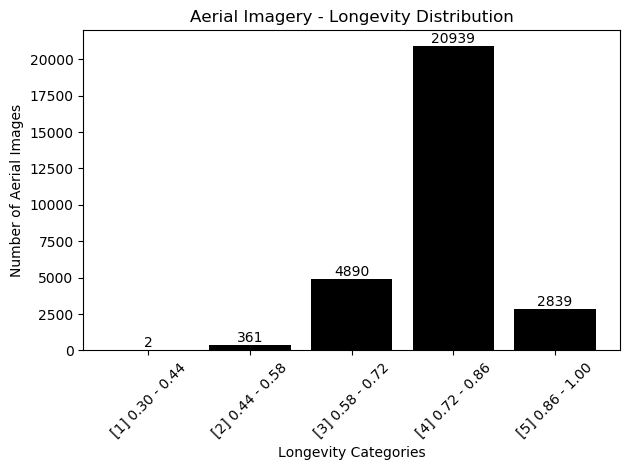

In [43]:

# Create a bar chart
plt.bar(longevity_category_counts.index, longevity_category_counts.values, color = 'black')
plt.xlabel('Longevity Categories')
plt.ylabel('Number of Aerial Images')
plt.title('Aerial Imagery - Longevity Distribution')
xtick_labels = [f'[{i+1}] {label}' for i, label in enumerate([f'{min_longevity + i * (max_longevity - min_longevity)/num_bins:.2f} - {min_longevity + (i+1) * (max_longevity - min_longevity)/num_bins:.2f}' for i in range(num_bins)])]
plt.xticks(range(num_bins), xtick_labels, rotation=45)


# Add value labels on top of each bar
for i, count in enumerate(longevity_category_counts):
    plt.text(i, count + 0.1, str(count), ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [44]:
# Calculate the minimum and maximum values of income
min_population = df_geo_sm['population'].min()
max_population = df_geo_sm['population'].max()

# Define the number of bins
num_bins = 5

# Create equally spaced bins
bins_population = pd.cut(df_geo_sm['population'], bins=num_bins, labels=False)


# Count the number of rows in each category
population_category_counts = bins_population.value_counts().sort_index()


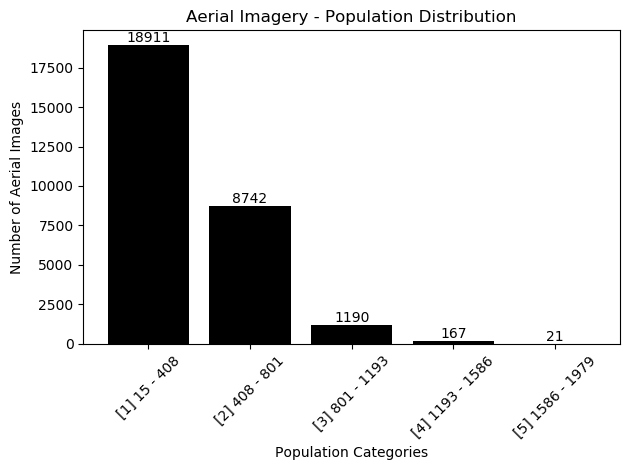

In [45]:

# Create a bar chart
plt.bar(population_category_counts.index, population_category_counts.values, color = 'black')
plt.xlabel('Population Categories')
plt.ylabel('Number of Aerial Images')
plt.title('Aerial Imagery - Population Distribution')
xtick_labels = [f'[{i+1}] {label}' for i, label in enumerate([f'{min_population + i * (max_population - min_population)/num_bins:.0f} - {min_population + (i+1) * (max_population - min_population)/num_bins:.0f}' for i in range(num_bins)])]
plt.xticks(range(num_bins), xtick_labels, rotation=45)


# Add value labels on top of each bar
for i, count in enumerate(population_category_counts):
    plt.text(i, count + 0.1, str(count), ha='center', va='bottom')

plt.tight_layout()
plt.show()

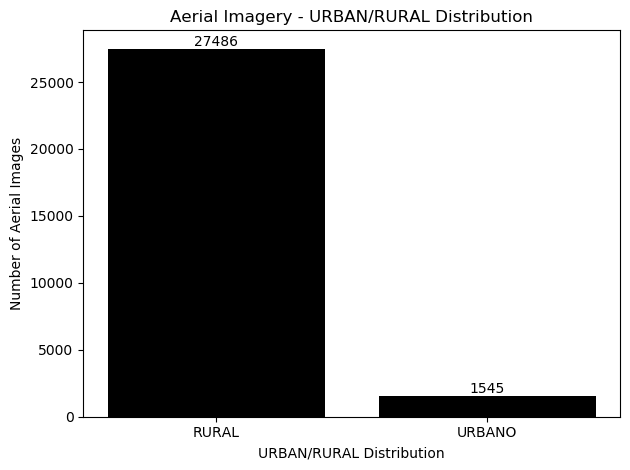

In [46]:
# Count the number of occurrences for each value in the "TIPO" column
tipo_counts = df_geo_sm['TIPO'].value_counts()


# Create a bar chart
plt.bar(tipo_counts.index, tipo_counts.values, color = 'black')
plt.xlabel('URBAN/RURAL Distribution')
plt.ylabel('Number of Aerial Images')
plt.title('Aerial Imagery - URBAN/RURAL Distribution')


# Add value labels on top of each bar
for i, count in enumerate(tipo_counts):
    plt.text(i, count + 0.1, str(count), ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [47]:
df_gv = pd.read_csv('df_sv_sm_short_fix.csv')
df_gv

,setor,filename,direction,image_name,count_image_y,income,longevity,literacy,population,TIPO
0,350270505000016,amYzj4DUMQbgHzB9M3a_WA-0.jpg,0,-24.515912057096592_-48.84748623854377_-24.421...,1.0,0.701822,0.850000,0.990476,292.0,URBANO
1,350270505000016,amYzj4DUMQbgHzB9M3a_WA-90.jpg,90,-24.515912057096592_-48.84748623854377_-24.421...,1.0,0.701822,0.850000,0.990476,292.0,URBANO
2,350270505000016,amYzj4DUMQbgHzB9M3a_WA-180.jpg,180,-24.515912057096592_-48.84748623854377_-24.421...,1.0,0.701822,0.850000,0.990476,292.0,URBANO
3,350270505000016,amYzj4DUMQbgHzB9M3a_WA-270.jpg,270,-24.515912057096592_-48.84748623854377_-24.421...,1.0,0.701822,0.850000,0.990476,292.0,URBANO
4,350270505000016,LoaIOwDck-H26nB1MZdD7Q-0.jpg,0,-24.515912057096592_-48.84748623854377_-24.421...,1.0,0.701822,0.850000,0.990476,292.0,URBANO
...,...,...,...,...,...,...,...,...,...,...
112363,412863305000010,oSXOgE7j3mV9lfiPJMwySA-270.jpg,270,-24.658311758683595_-49.42547097639885_-24.625...,85.0,0.449906,0.783333,0.900085,570.0,RURAL
112364,412863305000010,VknK6sWJIKFoVDOPr94viA-0.jpg,0,-24.658311758683595_-49.42547097639885_-24.625...,85.0,0.449906,0.783333,0.900085,570.0,RURAL
112365,412863305000010,VknK6sWJIKFoVDOPr94viA-90.jpg,90,-24.658311758683595_-49.42547097639885_-24.625...,85.0,0.449906,0.783333,0.900085,570.0,RURAL
112366,412863305000010,VknK6sWJIKFoVDOPr94viA-180.jpg,180,-24.658311758683595_-49.42547097639885_-24.625...,85.0,0.449906,0.783333,0.900085,570.0,RURAL


In [48]:
# Calculate the minimum and maximum values of income
min_income = df_gv['income'].min()
max_income = df_gv['income'].max()

# Define the number of bins
num_bins = 5

# Create equally spaced bins
bins = pd.cut(df_gv['income'], bins=num_bins, labels=False)


# Count the number of rows in each category
income_category_counts = bins.value_counts().sort_index()


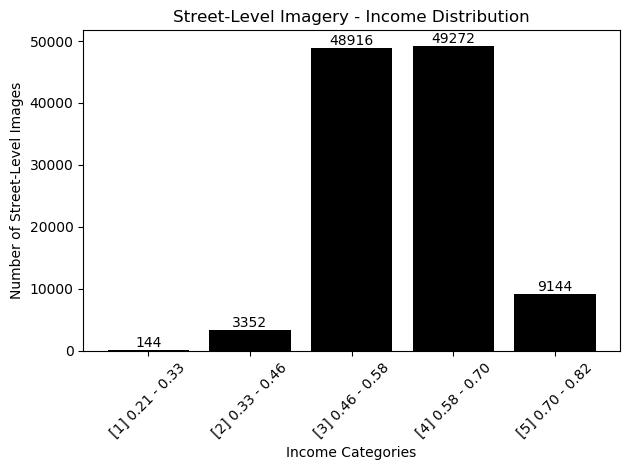

In [49]:
#plt.figure(figsize=(4,5)) 
# Create a bar chart
plt.bar(income_category_counts.index, income_category_counts.values, color = 'black')
plt.xlabel('Income Categories')
plt.ylabel('Number of Street-Level Images')
plt.title('Street-Level Imagery - Income Distribution')
#plt.xticks(range(num_bins), [f'{min_income + i * (max_income - min_income)/num_bins:.2f} - {min_income + (i+1) * (max_income - min_income)/num_bins:.2f}' for i in range(num_bins)], rotation=45)
xtick_labels = [f'[{i+1}] {label}' for i, label in enumerate([f'{min_income + i * (max_income - min_income)/num_bins:.2f} - {min_income + (i+1) * (max_income - min_income)/num_bins:.2f}' for i in range(num_bins)])]
plt.xticks(range(num_bins), xtick_labels, rotation=45)


# Add value labels on top of each bar
for i, count in enumerate(income_category_counts):
    plt.text(i, count + 0.1, str(count), ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [50]:
# Calculate the minimum and maximum values of income
min_literacy = df_gv['literacy'].min()
max_literacy = df_gv['literacy'].max()

# Define the number of bins
num_bins = 5

# Create equally spaced bins
bins_literacy = pd.cut(df_gv['literacy'], bins=num_bins, labels=False)


# Count the number of rows in each category
literacy_category_counts = bins_literacy.value_counts().sort_index()


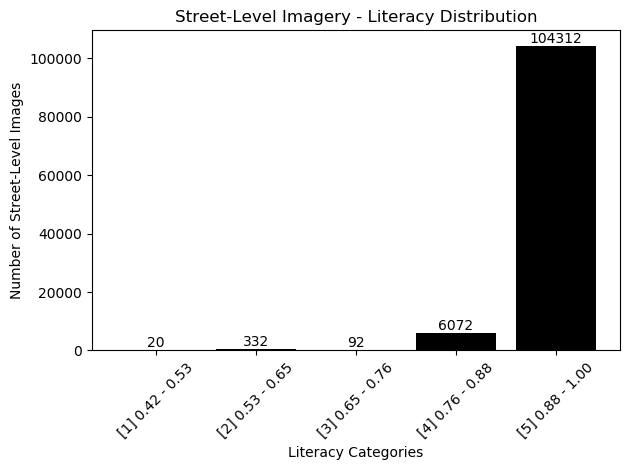

In [51]:
#plt.figure(figsize=(4,5)) 
# Create a bar chart
plt.bar(literacy_category_counts.index, literacy_category_counts.values, color = 'black')
plt.xlabel('Literacy Categories')
plt.ylabel('Number of Street-Level Images')
plt.title('Street-Level Imagery - Literacy Distribution')
#plt.xticks(range(num_bins), [f'{min_income + i * (max_income - min_income)/num_bins:.2f} - {min_income + (i+1) * (max_income - min_income)/num_bins:.2f}' for i in range(num_bins)], rotation=45)
xtick_labels = [f'[{i+1}] {label}' for i, label in enumerate([f'{min_literacy + i * (max_literacy - min_literacy)/num_bins:.2f} - {min_literacy + (i+1) * (max_literacy - min_literacy)/num_bins:.2f}' for i in range(num_bins)])]
plt.xticks(range(num_bins), xtick_labels, rotation=45)


# Add value labels on top of each bar
for i, count in enumerate(literacy_category_counts):
    plt.text(i, count + 0.1, str(count), ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [52]:
# Calculate the minimum and maximum values of income
min_longevity = df_gv['longevity'].min()
max_longevity = df_gv['longevity'].max()

# Define the number of bins
num_bins = 5

# Create equally spaced bins
bins_longevity = pd.cut(df_gv['longevity'], bins=num_bins, labels=False)


# Count the number of rows in each category
longevity_category_counts = bins_longevity.value_counts().sort_index()


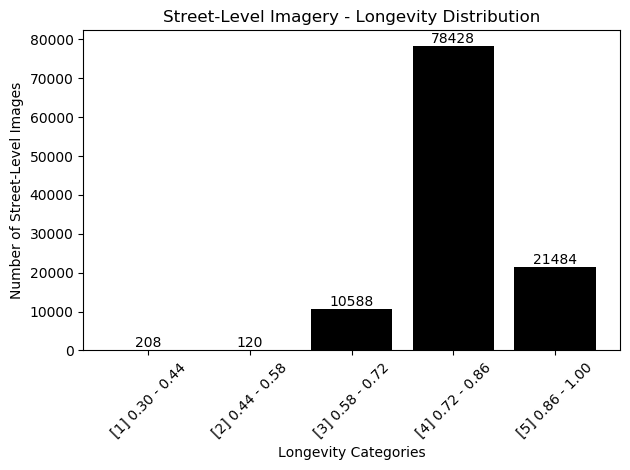

In [53]:

# Create a bar chart
plt.bar(longevity_category_counts.index, longevity_category_counts.values, color = 'black')
plt.xlabel('Longevity Categories')
plt.ylabel('Number of Street-Level Images')
plt.title('Street-Level Imagery - Longevity Distribution')
xtick_labels = [f'[{i+1}] {label}' for i, label in enumerate([f'{min_longevity + i * (max_longevity - min_longevity)/num_bins:.2f} - {min_longevity + (i+1) * (max_longevity - min_longevity)/num_bins:.2f}' for i in range(num_bins)])]
plt.xticks(range(num_bins), xtick_labels, rotation=45)


# Add value labels on top of each bar
for i, count in enumerate(longevity_category_counts):
    plt.text(i, count + 0.1, str(count), ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [54]:
# Calculate the minimum and maximum values of income
min_population = df_gv['population'].min()
max_population = df_gv['population'].max()

# Define the number of bins
num_bins = 5

# Create equally spaced bins
bins_population = pd.cut(df_gv['population'], bins=num_bins, labels=False)


# Count the number of rows in each category
population_category_counts = bins_population.value_counts().sort_index()


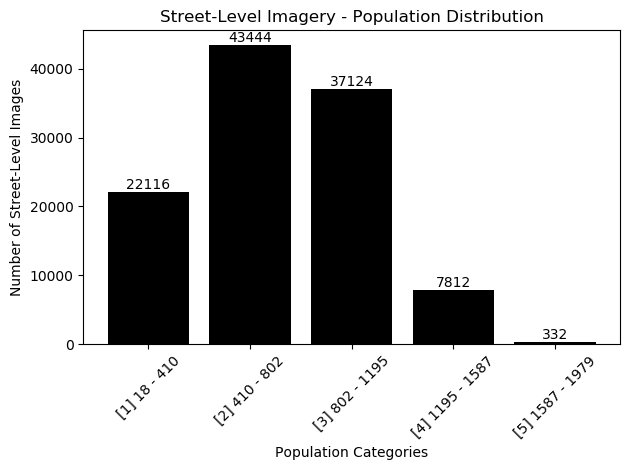

In [55]:

# Create a bar chart
plt.bar(population_category_counts.index, population_category_counts.values, color = 'black')
plt.xlabel('Population Categories')
plt.ylabel('Number of Street-Level Images')
plt.title('Street-Level Imagery - Population Distribution')
xtick_labels = [f'[{i+1}] {label}' for i, label in enumerate([f'{min_population + i * (max_population - min_population)/num_bins:.0f} - {min_population + (i+1) * (max_population - min_population)/num_bins:.0f}' for i in range(num_bins)])]
plt.xticks(range(num_bins), xtick_labels, rotation=45)


# Add value labels on top of each bar
for i, count in enumerate(population_category_counts):
    plt.text(i, count + 0.1, str(count), ha='center', va='bottom')

plt.tight_layout()
plt.show()

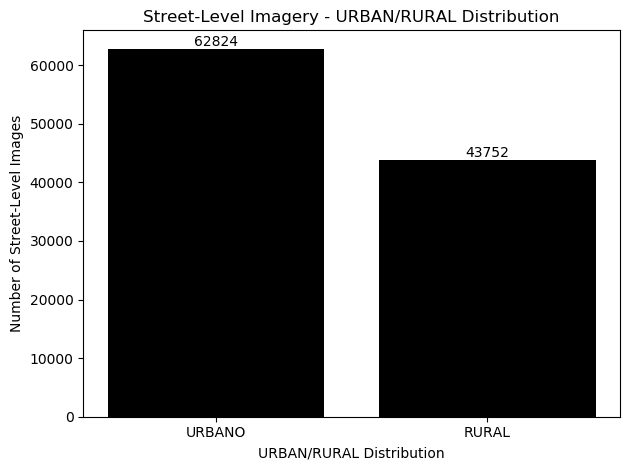

In [56]:
# Count the number of occurrences for each value in the "TIPO" column
tipo_counts = df_gv['TIPO'].value_counts()


# Create a bar chart
plt.bar(tipo_counts.index, tipo_counts.values, color = 'black')
plt.xlabel('URBAN/RURAL Distribution')
plt.ylabel('Number of Street-Level Images')
plt.title('Street-Level Imagery - URBAN/RURAL Distribution')


# Add value labels on top of each bar
for i, count in enumerate(tipo_counts):
    plt.text(i, count + 0.1, str(count), ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [57]:
df_fold0 = pd.read_csv('./FOLD_SV_SM_SAT_RIDGE_EXCLUSIVE_08Aug23_1725_literacy/0/data.csv')
df_fold0

,setor,image_name,filename,income,literacy,population,longevity,fold
0,412220605000001,-25.19611021097373_-49.18207788940514_-25.0764...,jd10Vm7VZZbihTeUJNql_Q-270.jpg,0.620412,0.961645,830.0,0.783333,4
1,412220605000052,-25.180515378453258_-49.16514186771816_-25.076...,Bpje2e5qQ5_vGtMPjrfziA-0.jpg,0.482752,0.931975,1073.0,0.716667,4
2,412220605000052,-25.180515378453258_-49.16514186771816_-25.076...,NwFPLKjppa9gMuONG9xtgg-90.jpg,0.482752,0.931975,1073.0,0.716667,4
3,412220605000053,-25.211705043494195_-49.30909805205747_-25.076...,1LOF-DsQ5rLJ2I_tM1iyMA-0.jpg,0.351935,0.948553,339.0,0.833333,4
4,412220605000007,-25.19611021097373_-49.18207788940514_-25.0764...,xtYtlcgtgheRHfU7jq_Fog-270.jpg,0.606185,0.967287,529.0,0.750000,4
...,...,...,...,...,...,...,...,...
11335,412220605000009,-25.211705043494195_-49.31756606290096_-25.076...,8v41H9SCvy9xsKdmW8W7Pg-270.jpg,0.598110,0.949984,681.0,0.750000,4
11336,412220605000050,-25.19611021097373_-49.30063004121398_-25.0764...,CeiUNAtUetIjmm5AjDOO7g-270.jpg,0.513897,0.897385,715.0,0.800000,4
11337,412220605000018,-25.180515378453258_-49.16514186771816_-25.076...,ikSlcgqWMEOOWhiKZ23hNA-180.jpg,0.551315,0.941402,832.0,0.666667,4
11338,412220605000017,-25.172717962193023_-49.31756606290096_-25.076...,GpZb0hWS8pDg4Jk2JvjjnA-90.jpg,0.522579,0.955658,757.0,0.816667,4


In [58]:
df_fold1 = pd.read_csv('./FOLD_SV_SM_SAT_RIDGE_EXCLUSIVE_08Aug23_1725_literacy/1/data.csv')
df_fold1

,setor,image_name,filename,income,literacy,population,longevity,fold
0,410020205000009,-24.672142137374188_-48.584619743403294_-24.78...,x4N_vfTG-Cb3pcTTNIzgMw-270.jpg,0.545044,0.900385,493.0,0.833333,1
1,352460005000004,-24.633835416045095_-47.921095068633676_-24.77...,I1SZB6094AqvXPXHrAdh0w-270.jpg,0.589892,0.950533,713.0,0.850000,1
2,352460005000001,-24.633835416045095_-47.921095068633676_-24.77...,vL8KdoMC1_xqiVv-gYca6w-90.jpg,0.703878,0.983447,700.0,0.883333,1
3,352990605000026,-24.318609713762104_-47.515132850426816_-24.19...,ZHcjqCpH8ofIbK3Lc7VAiA-90.jpg,0.000000,0.000000,0.0,0.000000,1
4,352990615000007,-24.20914570426189_-47.371742181489466_-24.195...,C9vRMZfTDj0lqCiCrozWzQ-270.jpg,0.520438,0.874737,172.0,0.750000,1
...,...,...,...,...,...,...,...,...
11252,352215805000004,-24.667448063114527_-48.8903661819956_-24.6178...,SHABGOszA6yppv9vqiV7DA-180.jpg,0.508862,0.944444,103.0,0.883333,1
11253,352990615000001,-24.15441369951178_-47.32113371009981_-24.1950...,GgC7o4Kmn1cLmshFfvPW4A-0.jpg,0.534090,0.963622,799.0,0.816667,1
11254,352330505000002,-24.29139632165216_-47.20619738737879_-24.1637...,ZP35nXFR-AI65Uew4NZvew-90.jpg,0.626369,0.948747,656.0,0.883333,1
11255,410020205000008,-24.72660668757591_-48.90027943823018_-24.7834...,em2g0N3ZwBm28nh2peAm7A-270.jpg,0.438668,0.860732,319.0,0.816667,1


In [59]:
df_fold2 = pd.read_csv('./FOLD_SV_SM_SAT_RIDGE_EXCLUSIVE_08Aug23_1725_literacy/2/data.csv')
df_fold2

,setor,image_name,filename,income,literacy,population,longevity,fold
0,352042605000013,-24.68250555026394_-47.441123972758355_-24.861...,RurlwwrjbqWYzLwnLf0DPA-180.jpg,0.592678,0.941708,416.0,0.750000,0
1,352042605000014,-24.736719054311727_-47.5349263642231_-24.8619...,fVe8aszMTRgVX0VdCcys3Q-270.jpg,0.624110,0.857898,434.0,0.833333,0
2,352042605000024,-24.736719054311727_-47.54345385435625_-24.861...,aCcOpzJoIw9CQfCQ87zy7A-180.jpg,0.614636,0.851967,396.0,0.783333,0
3,352042605000028,-24.752208626896806_-47.56903632475573_-24.861...,I2bnCyaiGxZrjP7PUnd6-w-0.jpg,0.645696,0.967250,327.0,0.866667,0
4,351480905000003,-24.52419867666163_-48.112921642141956_-24.495...,iDo9gBfdBNGjnXxMCEwFBA-270.jpg,0.621637,0.959053,1340.0,0.866667,0
...,...,...,...,...,...,...,...,...
11209,352042605000013,-24.68250555026394_-47.441123972758355_-24.861...,19jfp1egNvuS9y_sZjeV6Q-0.jpg,0.592678,0.941708,416.0,0.750000,0
11210,352042605000014,-24.736719054311727_-47.5349263642231_-24.8619...,1hsMQ4YZatk_nNvTsHbODA-180.jpg,0.624110,0.857898,434.0,0.833333,0
11211,350270505000004,-24.515912057096592_-48.84748623854377_-24.421...,6bSKB6oOHrWJdJp5wpL5jw-90.jpg,0.808376,0.939745,358.0,0.800000,0
11212,352042605000014,-24.736719054311727_-47.5349263642231_-24.8619...,ciQr50l33W5pYX_gAn59PA-270.jpg,0.624110,0.857898,434.0,0.833333,0


In [60]:
df_fold3 = pd.read_csv('./FOLD_SV_SM_SAT_RIDGE_EXCLUSIVE_08Aug23_1725_literacy/3/data.csv')
df_fold3

,setor,image_name,filename,income,literacy,population,longevity,fold
0,354260205000019,-24.506700482497266_-47.84734729275806_-24.504...,DEKLvkVklTKfrw7mo4zbgg-90.jpg,0.688079,0.975699,975.0,0.850000,2
1,354995305000001,-23.85257368363476_-46.94681471441281_-23.8524...,lqpPGtjBSWBdb5IoowkIng-0.jpg,0.620016,0.979964,1105.0,0.850000,2
2,354260205000021,-24.506700482497266_-47.8558350448406_-24.5040...,iE1A-eO1t96UmPv2mYXN0g-270.jpg,0.656981,0.977488,1084.0,0.883333,2
3,354260205000044,-24.42920752447183_-47.87281054900568_-24.5040...,4SIOXp-hQTeSKMvL8KADEw-270.jpg,0.607949,0.969921,1533.0,0.683333,2
4,353720605000016,-24.275733500347954_-47.240181299861476_-24.16...,lfS0lD_rozlkV1VJgB2UKA-180.jpg,0.561771,0.968961,689.0,0.750000,2
...,...,...,...,...,...,...,...,...
11182,354260205000010,-24.42920752447183_-47.84734729275806_-24.5040...,WYk8TGUahVJVOK_YqAzrOA-90.jpg,0.673172,0.995754,773.0,0.900000,2
11183,354260205000003,-24.42920752447183_-47.84734729275806_-24.5040...,7ytLHibT2IQJlsQwNDNTbw-0.jpg,0.651642,0.985452,1043.0,0.933333,2
11184,354260205000019,-24.506700482497266_-47.84734729275806_-24.504...,kVQbzMw0kVaUZemlQa_N-w-90.jpg,0.688079,0.975699,975.0,0.850000,2
11185,353720605000003,-24.28356491100006_-47.231685321740805_-24.163...,cL9OrKMD7PT24oyXxu-tZQ-180.jpg,0.597471,0.950257,912.0,0.850000,2


In [61]:
df_fold4 = pd.read_csv('./FOLD_SV_SM_SAT_RIDGE_EXCLUSIVE_08Aug23_1725_literacy/4/data.csv')
df_fold4

,setor,image_name,filename,income,literacy,population,longevity,fold
0,410310705000022,-25.236773001397985_-49.12781652055113_-25.116...,PR5GocYnftKiHyiTXIqoRg-270.jpg,0.486807,0.908283,457.0,0.800000,3
1,411125805000007,-25.20942964131847_-49.33100879214036_-25.1272...,Dj2i2mfNX2dC3Ej6z6ei_A-270.jpg,0.581071,0.898669,591.0,0.783333,3
2,411125805000009,-25.201616558379907_-49.34792563758888_-25.127...,unU2GVPTiqGvJRgGtHPHhg-270.jpg,0.522807,0.885829,1314.0,0.700000,3
3,410310705000021,-25.206120733341912_-49.11925668912867_-25.116...,wT06JvMKGGS2zHyp2aAI2g-270.jpg,0.583631,0.948234,864.0,0.800000,3
4,411125805000007,-25.20942964131847_-49.33100879214036_-25.1272...,L51kfwGG5_8aUNsnMaIXqw-0.jpg,0.581071,0.898669,591.0,0.783333,3
...,...,...,...,...,...,...,...,...
11181,411125805000028,-25.21724272425703_-49.33100879214036_-25.1272...,mIUQZYMK5HuMw5mgsWFsIQ-90.jpg,0.548642,0.909664,720.0,0.700000,3
11182,410310705000008,-25.183131532299853_-49.11925668912867_-25.116...,8L3vVESOngfTewDCBqDrIg-0.jpg,0.541631,0.917733,513.0,0.766667,3
11183,410310705000002,-25.21378380035593_-49.11069685770621_-25.1163...,zRRzUMM1UkUE6YWG6MWEgw-90.jpg,0.574363,0.944017,1145.0,0.800000,3
11184,410310705000002,-25.21378380035593_-49.11069685770621_-25.1163...,OqGNqxrqk7PrbzOVudQU7w-90.jpg,0.574363,0.944017,1145.0,0.800000,3


In [62]:
df_folds = pd.concat([df_fold0,df_fold1,df_fold2,df_fold3,df_fold4])
df_folds

,setor,image_name,filename,income,literacy,population,longevity,fold
0,412220605000001,-25.19611021097373_-49.18207788940514_-25.0764...,jd10Vm7VZZbihTeUJNql_Q-270.jpg,0.620412,0.961645,830.0,0.783333,4
1,412220605000052,-25.180515378453258_-49.16514186771816_-25.076...,Bpje2e5qQ5_vGtMPjrfziA-0.jpg,0.482752,0.931975,1073.0,0.716667,4
2,412220605000052,-25.180515378453258_-49.16514186771816_-25.076...,NwFPLKjppa9gMuONG9xtgg-90.jpg,0.482752,0.931975,1073.0,0.716667,4
3,412220605000053,-25.211705043494195_-49.30909805205747_-25.076...,1LOF-DsQ5rLJ2I_tM1iyMA-0.jpg,0.351935,0.948553,339.0,0.833333,4
4,412220605000007,-25.19611021097373_-49.18207788940514_-25.0764...,xtYtlcgtgheRHfU7jq_Fog-270.jpg,0.606185,0.967287,529.0,0.750000,4
...,...,...,...,...,...,...,...,...
11181,411125805000028,-25.21724272425703_-49.33100879214036_-25.1272...,mIUQZYMK5HuMw5mgsWFsIQ-90.jpg,0.548642,0.909664,720.0,0.700000,3
11182,410310705000008,-25.183131532299853_-49.11925668912867_-25.116...,8L3vVESOngfTewDCBqDrIg-0.jpg,0.541631,0.917733,513.0,0.766667,3
11183,410310705000002,-25.21378380035593_-49.11069685770621_-25.1163...,zRRzUMM1UkUE6YWG6MWEgw-90.jpg,0.574363,0.944017,1145.0,0.800000,3
11184,410310705000002,-25.21378380035593_-49.11069685770621_-25.1163...,OqGNqxrqk7PrbzOVudQU7w-90.jpg,0.574363,0.944017,1145.0,0.800000,3


In [63]:
# Get unique combinations of "fold" and "setor" columns
unique_combinations = df_folds[['fold', 'setor']].drop_duplicates()

print("Unique Combinations of Fold and Setor:")
unique_combinations

Unique Combinations of Fold and Setor:


,fold,setor
0,4,412220605000001
1,4,412220605000052
3,4,412220605000053
4,4,412220605000007
5,4,412220605000019
...,...,...
7135,3,410400605000030
8171,3,355180105000019
9183,3,355350005000006
9439,3,410520105000016


In [64]:
geo_folds = geo.merge(unique_combinations, left_on='CD_GEOCODI', right_on='setor', how='left')
geo_folds

,ID,CD_GEOCODI,TIPO,CD_GEOCODS,NM_SUBDIST,CD_GEOCODD,NM_DISTRIT,CD_GEOCODM,NM_MUNICIP,NM_MICRO,NM_MESO,ORIG_OGC_F,geometry,fold,setor
0,66717.0,350270505000001,URBANO,35027050500,NaN,350270505,APIAÍ,3502705,APIAÍ,CAPÃO BONITO,ITAPETININGA,1805,"POLYGON ((-48.84713 -24.51469, -48.84753 -24.5...",NaN,NaN
1,66718.0,350270505000002,URBANO,35027050500,NaN,350270505,APIAÍ,3502705,APIAÍ,CAPÃO BONITO,ITAPETININGA,1806,"POLYGON ((-48.84580 -24.51313, -48.84650 -24.5...",0.0,3.502705e+14
2,66719.0,350270505000003,URBANO,35027050500,NaN,350270505,APIAÍ,3502705,APIAÍ,CAPÃO BONITO,ITAPETININGA,1807,"POLYGON ((-48.84489 -24.51740, -48.84509 -24.5...",0.0,3.502705e+14
3,66720.0,350270505000004,URBANO,35027050500,NaN,350270505,APIAÍ,3502705,APIAÍ,CAPÃO BONITO,ITAPETININGA,1808,"POLYGON ((-48.85038 -24.52333, -48.85048 -24.5...",0.0,3.502705e+14
4,66721.0,350270505000005,URBANO,35027050500,NaN,350270505,APIAÍ,3502705,APIAÍ,CAPÃO BONITO,ITAPETININGA,1809,"POLYGON ((-48.84228 -24.52494, -48.84244 -24.5...",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
953,21414.0,412863305000009,RURAL,41286330500,NaN,412863305,DOUTOR ULYSSES,4128633,DOUTOR ULYSSES,CERRO AZUL,METROPOLITANA DE CURITIBA,17654,"POLYGON ((-49.39916 -24.70718, -49.35284 -24.6...",3.0,4.128633e+14
954,21415.0,412863305000010,RURAL,41286330500,NaN,412863305,DOUTOR ULYSSES,4128633,DOUTOR ULYSSES,CERRO AZUL,METROPOLITANA DE CURITIBA,17655,"POLYGON ((-49.37073 -24.61246, -49.36844 -24.6...",4.0,4.128633e+14
955,21416.0,412863305000011,RURAL,41286330500,NaN,412863305,DOUTOR ULYSSES,4128633,DOUTOR ULYSSES,CERRO AZUL,METROPOLITANA DE CURITIBA,17656,"POLYGON ((-49.46065 -24.62345, -49.46026 -24.6...",3.0,4.128633e+14
956,21417.0,412863305000012,RURAL,41286330500,NaN,412863305,DOUTOR ULYSSES,4128633,DOUTOR ULYSSES,CERRO AZUL,METROPOLITANA DE CURITIBA,17657,"POLYGON ((-49.53348 -24.68126, -49.53345 -24.6...",3.0,4.128633e+14


/opt/conda/lib/python3.7/site-packages/geopandas/plotting.py:51: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:
/opt/conda/lib/python3.7/site-packages/geopandas/plotting.py:51: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:


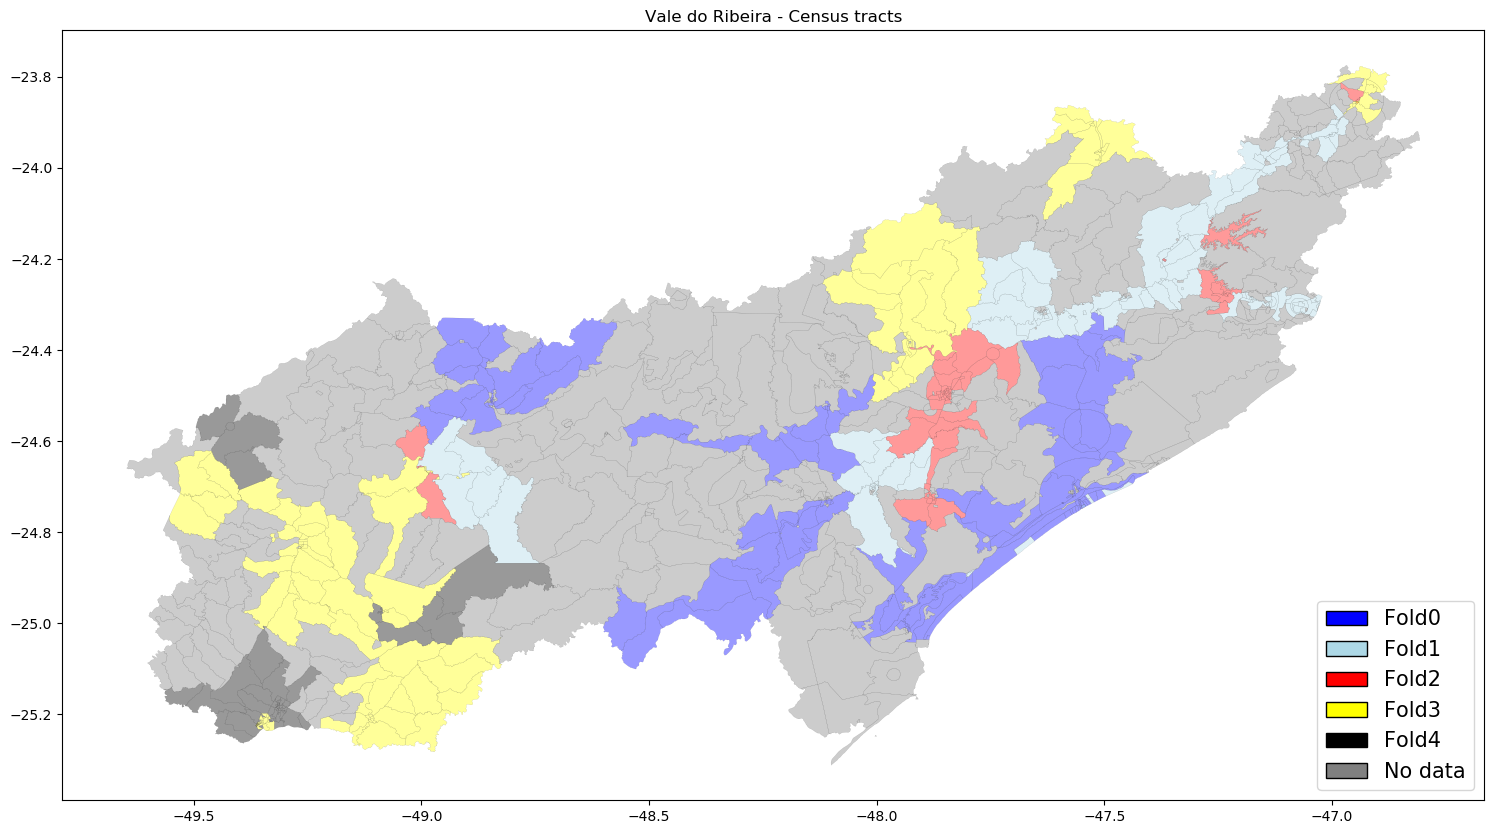

In [70]:
fig, axs = plt.subplots(1, 1, figsize=(5*5, 2*5))
fig.subplots_adjust(hspace=0.5, wspace=0.5)
axs.set_title('Vale do Ribeira - Census tracts')   

# Plotting and storing plot objects
geo_folds[geo_folds['fold']==0].plot(color='blue', alpha=0.4, edgecolor='black', ax=axs, linewidth=0.1)  # contour
geo_folds[geo_folds['fold']==1].plot(color='lightblue', alpha=0.4, edgecolor='black', ax=axs, linewidth=0.1)  # contour
geo_folds[geo_folds['fold']==2].plot(color='red', alpha=0.4, edgecolor='black', ax=axs, linewidth=0.1)  # contour
geo_folds[geo_folds['fold']==3].plot(color='yellow', alpha=0.4, edgecolor='black', ax=axs, linewidth=0.1)  # contour
geo_folds[geo_folds['fold']==4].plot(color='black', alpha=0.4, edgecolor='black', ax=axs, linewidth=0.1)  # contour
geo_folds[geo_folds['fold'].isna()].plot(color='gray', alpha=0.4, edgecolor='black', ax=axs, linewidth=0.1)  # contour
#gdf_geo_sm.plot(color='lightblue', alpha=0.6, edgecolor='blue', ax=axs, linewidth=0.1)  # contour
#gdf_OuterPolygon.plot(color='purple', alpha=0.6, edgecolor='purple', ax=axs, linewidth=0.1)  # contour
#gdf_geo_sv.plot(color='red', alpha=0.4, edgecolor='red', ax=axs, linewidth=0.01)  # contour


axs.legend(handles=[                    
                    Patch(facecolor='blue', edgecolor='black',label='Fold0'),
                    Patch(facecolor='lightblue',edgecolor='black', label='Fold1'),
                    Patch(facecolor='red', edgecolor='black', label='Fold2'),
                    Patch(facecolor='yellow',edgecolor='black', label='Fold3'),
                    Patch(facecolor='black',edgecolor='black', label='Fold4'),
                    Patch(facecolor='gray',edgecolor='black', label='No data')
                   ],
                    loc='lower right',
                    fontsize=15)

plt.show()

#plt.savefig(fname='plots/map_folds.jpg', dpi=300, facecolor='w', edgecolor='w',bbox_inches='tight')

In [71]:
diff_df = pd.read_csv('diff.csv')
diff_df

,setor,y_diff
0,350270505000002,-0.044305
1,350270505000003,0.067024
2,350270505000004,0.099577
3,350270505000006,0.047485
4,350270505000009,0.049170
...,...,...
545,412863305000008,0.007617
546,412863305000009,-0.041142
547,412863305000010,-0.069496
548,412863305000011,-0.016888


In [72]:
diff_df['y_diff'].min()

-0.1433507755348556

In [73]:
diff_df['y_diff'].max()

0.203787988351009

In [74]:
# Categorize the differences into 5 categories within the interval [-0.2, 0.2]
category_labels = ['Diff1', 'Diff2', 'Diff3', 'Diff4', 'Diff5']
bin_edges = np.linspace(-0.2, 0.2, len(category_labels) + 1)
diff_df['category'] = pd.cut(diff_df['y_diff'], bins=bin_edges, labels=category_labels, include_lowest=True)

# Create a dictionary to map categories to grayscale colors
num_categories = len(category_labels)
gray_colors = plt.cm.gray(np.linspace(0.2, 0.8, num_categories))  # Generate a range of grayscale colors
category_colors = {category_labels[i]: gray_colors[i] for i in range(num_categories)}


In [75]:
geo_diff = geo.merge(diff_df, left_on='CD_GEOCODI', right_on='setor', how='left')
geo_diff

,ID,CD_GEOCODI,TIPO,CD_GEOCODS,NM_SUBDIST,CD_GEOCODD,NM_DISTRIT,CD_GEOCODM,NM_MUNICIP,NM_MICRO,NM_MESO,ORIG_OGC_F,geometry,setor,y_diff,category
0,66717.0,350270505000001,URBANO,35027050500,NaN,350270505,APIAÍ,3502705,APIAÍ,CAPÃO BONITO,ITAPETININGA,1805,"POLYGON ((-48.84713 -24.51469, -48.84753 -24.5...",NaN,NaN,NaN
1,66718.0,350270505000002,URBANO,35027050500,NaN,350270505,APIAÍ,3502705,APIAÍ,CAPÃO BONITO,ITAPETININGA,1806,"POLYGON ((-48.84580 -24.51313, -48.84650 -24.5...",3.502705e+14,-0.044305,Diff2
2,66719.0,350270505000003,URBANO,35027050500,NaN,350270505,APIAÍ,3502705,APIAÍ,CAPÃO BONITO,ITAPETININGA,1807,"POLYGON ((-48.84489 -24.51740, -48.84509 -24.5...",3.502705e+14,0.067024,Diff4
3,66720.0,350270505000004,URBANO,35027050500,NaN,350270505,APIAÍ,3502705,APIAÍ,CAPÃO BONITO,ITAPETININGA,1808,"POLYGON ((-48.85038 -24.52333, -48.85048 -24.5...",3.502705e+14,0.099577,Diff4
4,66721.0,350270505000005,URBANO,35027050500,NaN,350270505,APIAÍ,3502705,APIAÍ,CAPÃO BONITO,ITAPETININGA,1809,"POLYGON ((-48.84228 -24.52494, -48.84244 -24.5...",NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
949,21414.0,412863305000009,RURAL,41286330500,NaN,412863305,DOUTOR ULYSSES,4128633,DOUTOR ULYSSES,CERRO AZUL,METROPOLITANA DE CURITIBA,17654,"POLYGON ((-49.39916 -24.70718, -49.35284 -24.6...",4.128633e+14,-0.041142,Diff2
950,21415.0,412863305000010,RURAL,41286330500,NaN,412863305,DOUTOR ULYSSES,4128633,DOUTOR ULYSSES,CERRO AZUL,METROPOLITANA DE CURITIBA,17655,"POLYGON ((-49.37073 -24.61246, -49.36844 -24.6...",4.128633e+14,-0.069496,Diff2
951,21416.0,412863305000011,RURAL,41286330500,NaN,412863305,DOUTOR ULYSSES,4128633,DOUTOR ULYSSES,CERRO AZUL,METROPOLITANA DE CURITIBA,17656,"POLYGON ((-49.46065 -24.62345, -49.46026 -24.6...",4.128633e+14,-0.016888,Diff3
952,21417.0,412863305000012,RURAL,41286330500,NaN,412863305,DOUTOR ULYSSES,4128633,DOUTOR ULYSSES,CERRO AZUL,METROPOLITANA DE CURITIBA,17657,"POLYGON ((-49.53348 -24.68126, -49.53345 -24.6...",4.128633e+14,-0.031152,Diff3


In [76]:
# Define bin ranges for legend labels
legend_labels = [
    f'd = {bin_edges[i]:.2f} to {bin_edges[i+1]:.2f}'
    for i in range(len(bin_edges) - 1)
]

In [77]:

# Define hatch patterns for legend patches
hatch_patterns = ['////', '----', '\\\\\\\\', '....', '||||']


/opt/conda/lib/python3.7/site-packages/geopandas/plotting.py:51: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:
/opt/conda/lib/python3.7/site-packages/geopandas/plotting.py:51: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:


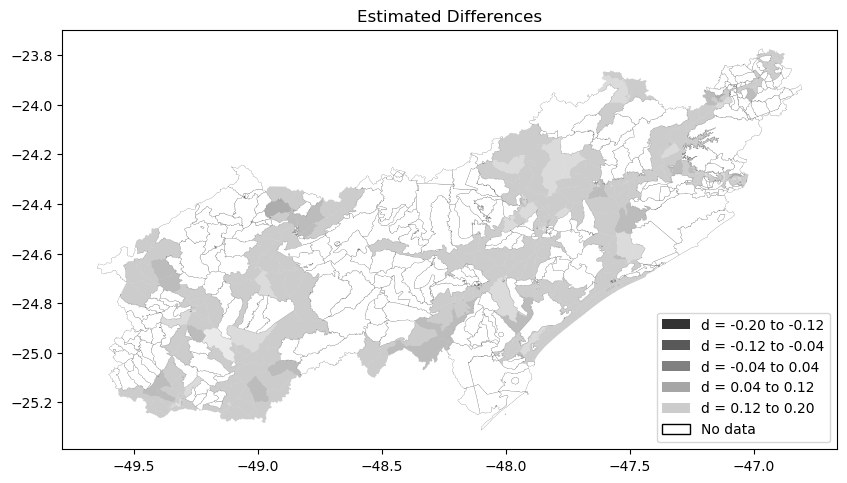

In [81]:
# Plotting
fig, axs = plt.subplots(1, 1, figsize=(10, 8))
axs.set_title('Estimated Differences')

# Plotting and storing plot objects
for category, color in category_colors.items():
    geo_diff[geo_diff['category'] == category].plot(color=color, alpha=0.4, ax=axs, linewidth=0.1)

# Plotting rows with NaN category in white with black borders
geo_diff[geo_diff['category'].isna()].plot(color='white', edgecolor='black', ax=axs, linewidth=0.1)

# Creating legend patches dynamically

legend_patches = [
    Patch(facecolor=color, label=label)
    for color, label in zip(gray_colors, legend_labels)
]
legend_patches.append(Patch(facecolor='white', edgecolor='black', label='No data'))

axs.legend(handles=legend_patches, loc='lower right', fontsize=10)

filename = "Estimated Differences.jpg"
filepath = os.path.join(output_folder, filename)

#plt.savefig(filepath)
#plt.close

plt.show()



In [55]:
# Plotting
fig, axs = plt.subplots(1, 1, figsize=(10, 8))
axs.set_title('Categorized Differences')

# Plotting and storing plot objects
for i, (category, color) in enumerate(category_colors.items()):
    geo_diff[geo_diff['category'] == category].plot(color=color, alpha=0.4, ax=axs, linewidth=0.1, hatch=hatch_patterns[i])

# Plotting rows with NaN category in white with black borders
geo_diff[geo_diff['category'].isna()].plot(color='white', edgecolor='black', ax=axs, linewidth=0.1)

# Creating legend patches dynamically
legend_patches = [
    Patch(facecolor='white', edgecolor='black', label=label, hatch=hatch)
    for label, hatch in zip(legend_labels, hatch_patterns)
]

axs.legend(handles=legend_patches, loc='lower right', fontsize=10)

filename = "Predict Differences - pattern.jpg"
filepath = os.path.join(output_folder, filename)

plt.savefig(filepath)
plt.close
#plt.show()

/opt/conda/lib/python3.7/site-packages/geopandas/plotting.py:51: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:
/opt/conda/lib/python3.7/site-packages/geopandas/plotting.py:51: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:


<function matplotlib.pyplot.close(fig=None)>